---
title: "Data analysis with Python"
author: "Louis Olive"
format:
  html:
    toc: true
    number-sections: true
---

# Introduction to pandas

Pandas is a Python package that provides high-performance and easy to use
data structures and data analysis tools.

This section povides a brief overview of pandas. The developpers of pandas have also delivered an excellent documentation and training material, including:

* a [`10 minutes to pandas`](https://pandas.pydata.org/docs/user_guide/10min.html)
  introduction
* a very detailed [`documentation`](https://pandas.pydata.org/docs)
* a [`cookbook`](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook) giving useful recipes
* comparisons with other data analysis tools for exemple [spreadsheets](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_spreadsheets.html) or [`R`](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html)
* you can also go to COREP print the official [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Another very good reference is the book [Python for Data Analysis](https://wesmckinney.com/book/), by Wes McKinney, the creator of pandas.

In [1]:
import numpy as np

import pandas as pd

In [2]:
#| code-fold: true
# A little bit of Setup
import os
from IPython.display import Image as Img

dir_data = '../data'

dir_assets = './assets'

def img_colab(img_path):
    '''
    Helper function returning an image to be displayed by Jupyter Notebook / IPython.display module.
    
    Parameters
    ----------
    path : path to image
        The image should be in a child folder "./assets".
    '''

    display(Img(os.path.join(dir_assets, img_path)))
    return None

In [4]:
#| code-fold: true
# # Within Google Colab (uncomment below)

# # mount my Google Drive on the VM
# from google.colab import drive
# drive.mount('/gdrive')

# # You should have already created a 'teaching_Python' folder 
# # within your Google Drive to persist code and data

# # the following code should then list the files in the data folder
# dir_python = '/gdrive/MyDrive/teaching_Python'

# dir_data = os.path.join(dir_python, 'data')
# os.listdir(dir_data)

We start by providing a brief tour of pandas library. 

Pandas provides two types of objects for handling data:

* `Series`: a one-dimensional labeled array holding data of any type
    such as integers, strings, Python objects etc.
* `DataFrame`: a two-dimensional data structure that holds data like
   a two-dimension array or a table with rows and columns. You can think of it like a spreadsheet or SQL table, or a dict of `Series` objects. 

Both have their axis (rows for `Series`, rows and columns for `DataFrame`) indexed or labeled using an object `Index`. 

We already met these two objects in the first lesson:

* a `Series` of Moody's Aaa Corporate bond yields retrieved from FRED:

In [5]:
#| code-fold: true
# url_aaa = 'https://fred.stlouisfed.org/series/AAA/downloaddata/AAA.csv'
# aaa_series = pd.read_csv(url_aaa)
# aaa_series["DATE"] = pd.to_datetime(aaa_series["DATE"])

In [7]:
aaa_series = pd.read_csv(os.path.join(dir_data, 'aaa_series.csv'),
                         index_col="DATE",
                         parse_dates=True).squeeze('columns')
print(type(aaa_series))
aaa_series.index

<class 'pandas.core.series.Series'>


DatetimeIndex(['1919-01-01', '1919-02-01', '1919-03-01', '1919-04-01',
               '1919-05-01', '1919-06-01', '1919-07-01', '1919-08-01',
               '1919-09-01', '1919-10-01',
               ...
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01'],
              dtype='datetime64[ns]', name='DATE', length=1268, freq=None)

A quick reminder of what is inside `aaa_series``:

In [8]:
aaa_series.head()

DATE
1919-01-01    5.35
1919-02-01    5.35
1919-03-01    5.39
1919-04-01    5.44
1919-05-01    5.39
Name: VALUE, dtype: float64

* a `DataFrame` of 4 monthly times series of yields retrieved from FRED plus two spreads between these yields:

In [9]:
#| code-fold: true
# list_series_names = ['AAA', 'BAA', 'DGS30', 'MORTGAGE30US']
# list_series = []

# for series in list_series_names:
#     url_series = f'https://fred.stlouisfed.org/series/{series}/downloaddata/{series}.csv'
#     data_series = pd.read_csv(url_series, parse_dates=["DATE"])
#     data_series = data_series.replace('.', np.NaN)
#     data_series["VALUE"] = pd.to_numeric(data_series["VALUE"])
#     data_series = data_series.rename(columns={"VALUE":series}).set_index('DATE')
#     list_series.append(data_series)

# data = pd.concat(list_series, axis=1, join='outer')
# data_monthly = data[list_series_names].resample('M').mean().dropna().sort_index()
# data_monthly["aaa_baa_spread"] = (data_monthly["BAA"]
#                                           - data_monthly["AAA"])
# data_monthly["mortgage_treasury_spread"] = (data_monthly["MORTGAGE30US"]
#                                            - data_monthly["DGS30"]) 

In [10]:
data_monthly = pd.read_csv(os.path.join(dir_data, 'data_monthly.csv'),
                           index_col="DATE",
                           parse_dates=True)
print(type(data_monthly))
data_monthly.index


<class 'pandas.core.frame.DataFrame'>


DatetimeIndex(['1977-02-28', '1977-03-31', '1977-04-30', '1977-05-31',
               '1977-06-30', '1977-07-31', '1977-08-31', '1977-09-30',
               '1977-10-31', '1977-11-30',
               ...
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31'],
              dtype='datetime64[ns]', name='DATE', length=571, freq=None)

A quick reminder of what is inside `data_monthly`:

In [11]:
data_monthly.head()

,AAA,BAA,DGS30,MORTGAGE30US,aaa_baa_spread,mortgage_treasury_spread
DATE,,,,,,
1977-02-28,8.04,9.12,7.754444,8.6700,1.08,0.915556
1977-03-31,8.10,9.12,7.796087,8.6875,1.02,0.891413
1977-04-30,8.04,9.07,7.734500,8.7520,1.03,1.017500
1977-05-31,8.05,9.01,7.798095,8.8275,0.96,1.029405
1977-06-30,7.95,8.91,7.635909,8.8575,0.96,1.221591


## Viewing data

Use `.head()` and `.tail()` methods to view the top and bottom rows of the pandas objects:

In [13]:
data_monthly.head()

,AAA,BAA,DGS30,MORTGAGE30US,aaa_baa_spread,mortgage_treasury_spread
DATE,,,,,,
1977-02-28,8.04,9.12,7.754444,8.6700,1.08,0.915556
1977-03-31,8.10,9.12,7.796087,8.6875,1.02,0.891413
1977-04-30,8.04,9.07,7.734500,8.7520,1.03,1.017500
1977-05-31,8.05,9.01,7.798095,8.8275,0.96,1.029405
1977-06-30,7.95,8.91,7.635909,8.8575,0.96,1.221591


In [14]:
aaa_series.tail()

DATE
2024-04-01    5.28
2024-05-01    5.25
2024-06-01    5.13
2024-07-01    5.12
2024-08-01    4.87
Name: VALUE, dtype: float64

You can display the pandas objects `Index`:

In [15]:
aaa_series.index

DatetimeIndex(['1919-01-01', '1919-02-01', '1919-03-01', '1919-04-01',
               '1919-05-01', '1919-06-01', '1919-07-01', '1919-08-01',
               '1919-09-01', '1919-10-01',
               ...
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01'],
              dtype='datetime64[ns]', name='DATE', length=1268, freq=None)

In [16]:
data_monthly.index

DatetimeIndex(['1977-02-28', '1977-03-31', '1977-04-30', '1977-05-31',
               '1977-06-30', '1977-07-31', '1977-08-31', '1977-09-30',
               '1977-10-31', '1977-11-30',
               ...
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31'],
              dtype='datetime64[ns]', name='DATE', length=571, freq=None)

You can display the DataFrame objects columns (`.columns`):

In [17]:
data_monthly.columns

Index(['AAA', 'BAA', 'DGS30', 'MORTGAGE30US', 'aaa_baa_spread',
       'mortgage_treasury_spread'],
      dtype='object')

`.describe()` shows a quick statistic summary of your data:

In [18]:
data_monthly.describe()

,AAA,BAA,DGS30,MORTGAGE30US,aaa_baa_spread,mortgage_treasury_spread
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,7.015762,8.076462,6.219474,7.644368,1.060701,1.424894
std,2.949374,3.153537,3.021680,3.403854,0.435286,0.713183
min,2.140000,3.160000,1.265238,2.684000,0.550000,0.114000
25%,4.665000,5.700000,3.801053,4.870500,0.770000,0.942250
50%,6.690000,7.700000,5.585000,7.030000,0.940000,1.295595
75%,8.860000,9.885000,8.167012,9.742000,1.210000,1.698709
max,15.490000,17.180000,14.684286,18.454000,3.380000,4.925000


`.info()` shows another summary of your data, showing in particular object, index and columns types. It is useful to grasp what is inside your pandas object:

In [19]:
aaa_series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1268 entries, 1919-01-01 to 2024-08-01
Series name: VALUE
Non-Null Count  Dtype  
--------------  -----  
1268 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [20]:
data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 571 entries, 1977-02-28 to 2024-08-31
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AAA                       571 non-null    float64
 1   BAA                       571 non-null    float64
 2   DGS30                     571 non-null    float64
 3   MORTGAGE30US              571 non-null    float64
 4   aaa_baa_spread            571 non-null    float64
 5   mortgage_treasury_spread  571 non-null    float64
dtypes: float64(6)
memory usage: 31.2 KB


Similarly you can show what type of data your pandas object hold (`.dtypes`)

In [21]:
aaa_series.dtypes

dtype('float64')

In [22]:
data_monthly.dtypes

AAA                         float64
BAA                         float64
DGS30                       float64
MORTGAGE30US                float64
aaa_baa_spread              float64
mortgage_treasury_spread    float64
dtype: object

`.shape` gives you the "dimensions" of your pandas object (rows, columns):

In [23]:
aaa_series.shape

(1268,)

In [24]:
data_monthly.shape

(571, 6)

You can transpose the data (`.transpose()` or `.T`):

In [25]:
data_monthly_t = data_monthly.T
data_monthly.transpose()

DATE,1977-02-28,1977-03-31,1977-04-30,1977-05-31,1977-06-30,1977-07-31,1977-08-31,1977-09-30,1977-10-31,1977-11-30,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31
AAA,8.040000,8.100000,8.0400,8.050000,7.950000,7.940000,7.980000,7.920000,8.0400,8.080000,...,5.280,4.7400,4.870000,5.030,5.01,5.280000,5.25,5.130000,5.120000,4.870000
BAA,9.120000,9.120000,9.0700,9.010000,8.910000,8.870000,8.820000,8.800000,8.8900,8.950000,...,6.290,5.6400,5.680000,5.770,5.75,6.000000,5.95,5.820000,5.840000,5.600000
DGS30,7.754444,7.796087,7.7345,7.798095,7.635909,7.644737,7.683478,7.643333,7.7745,7.846842,...,4.660,4.1445,4.258095,4.377,4.36,4.659091,4.62,4.444737,4.461364,4.153636
MORTGAGE30US,8.670000,8.687500,8.7520,8.827500,8.857500,8.942000,8.940000,8.896000,8.9225,8.922500,...,7.442,6.8150,6.642500,6.776,6.82,6.992500,7.06,6.917500,6.847500,6.500000
aaa_baa_spread,1.080000,1.020000,1.0300,0.960000,0.960000,0.930000,0.840000,0.880000,0.8500,0.870000,...,1.010,0.9000,0.810000,0.740,0.74,0.720000,0.70,0.690000,0.720000,0.730000
mortgage_treasury_spread,0.915556,0.891413,1.0175,1.029405,1.221591,1.297263,1.256522,1.252667,1.1480,1.075658,...,2.782,2.6705,2.384405,2.399,2.46,2.333409,2.44,2.472763,2.386136,2.346364


In [26]:
data_monthly_t.index

Index(['AAA', 'BAA', 'DGS30', 'MORTGAGE30US', 'aaa_baa_spread',
       'mortgage_treasury_spread'],
      dtype='object')

You can sort a pandas object by its index (`.sort_index()`):

In [27]:
aaa_series.sort_index(ascending=False)

DATE
2024-08-01    4.87
2024-07-01    5.12
2024-06-01    5.13
2024-05-01    5.25
2024-04-01    5.28
              ... 
1919-05-01    5.39
1919-04-01    5.44
1919-03-01    5.39
1919-02-01    5.35
1919-01-01    5.35
Name: VALUE, Length: 1268, dtype: float64

## Basic object creation

There are many ways to initiate a Series or a Dataframe, see [here](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro) for example. 

A basic method to create a `Series` is to call `pd.Series(data)` where data is a dict:

In [28]:
d = {"b": 1, "a": 0, "c": 2}
s = pd.Series(d)
s

b    1
a    0
c    2
dtype: int64

A basic method to create a `DataFrame` is to call `pd.DataFrame(data)` where data is a dict of `Series`:

In [29]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


 In practice we can create DataFrames from a many of sources such as other Python objects, csv files, http requests. In this lesson, we will see some examples. The [documentation](https://pandas.pydata.org/docs/user_guide/io.html) shows an exhaustive list.

From a csv file (even from an url and compressed)

In [30]:
# Import listings data (takes a few seconds to download unzip)
url_airbnb_bordeaux = 'http://data.insideairbnb.com/france/nouvelle-aquitaine/bordeaux/2023-06-11/data/listings.csv.gz'

df_airbnb_bordeaux = pd.read_csv(url_airbnb_bordeaux, compression='gzip')

df_airbnb_bordeaux.to_csv(os.path.join(dir_data, 'df_airbnb_bordeaux.csv'))

In [31]:
df_airbnb_bordeaux.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,222887,https://www.airbnb.com/rooms/222887,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.75 · 2 bedrooms ·...,Picture yourself on a 12 metre terrace overloo...,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,...,4.96,4.70,4.59,3306300031048,t,4,4,0,0,0.52
1,317273,https://www.airbnb.com/rooms/317273,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.88 · 1 bedroom · ...,"A spacious one bedroom apartment, (93 sq metre...",Bordeaux's famous Jardin Public is at the end ...,https://a0.muscache.com/pictures/miso/Hosting-...,1156398,...,4.95,4.93,4.71,33063001366CB,f,4,4,0,0,0.40
2,1196311,https://www.airbnb.com/rooms/1196311,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.46 · 3 bedrooms ·...,"Dans rue piétonne, duplex de 100 m2 calme et ...",Le quartier est entièrement piétonnier et sans...,https://a0.muscache.com/pictures/63797664/0c4d...,4496051,...,4.65,4.91,4.57,"Available with a mobility lease only (""bail mo...",f,2,2,0,0,0.26


**Exercise** Exploring a DataFrame

Using what we have seen explore the df_airbnb_bordeaux.

For example:

* how many rows and columns?

* column names?

* what is the index?

* what is inside the DataFrame (type of data)?

* last rows of data?




In [30]:
# YOUR CODE HERE

In [32]:
#| code-fold: true
# how many rows and columns?
print(df_airbnb_bordeaux.shape)

# column names?
print(df_airbnb_bordeaux.columns)


(11282, 75)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_a

In [33]:
#| code-fold: true
# what is the index?
df_airbnb_bordeaux.index


RangeIndex(start=0, stop=11282, step=1)

In [34]:
#| code-fold: true
# what is inside the DataFrame (type of data)?
df_airbnb_bordeaux.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11282 entries, 0 to 11281
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11282 non-null  int64  
 1   listing_url                                   11282 non-null  object 
 2   scrape_id                                     11282 non-null  int64  
 3   last_scraped                                  11282 non-null  object 
 4   source                                        11282 non-null  object 
 5   name                                          11282 non-null  object 
 6   description                                   11112 non-null  object 
 7   neighborhood_overview                         6625 non-null   object 
 8   picture_url                                   11282 non-null  object 
 9   host_id                                       11282 non-null 

In [35]:
#| code-fold: true
# last rows of data?
df_airbnb_bordeaux.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
11277,910596823597096706,https://www.airbnb.com/rooms/910596823597096706,20230611151841,2023-06-12,city scrape,Home in Bordeaux · ★New · 2 bedrooms · 2 beds ...,Cet hébergement spacieux et élégant est parfai...,NaN,https://a0.muscache.com/pictures/fcff7f81-e9f8...,517694830,...,NaN,NaN,NaN,3306300585676,f,1,1,0,0,NaN
11278,910645743995224909,https://www.airbnb.com/rooms/910645743995224909,20230611151841,2023-06-11,city scrape,Rental unit in Bègles · ★New · 1 bedroom · 1 b...,Détendez-vous dans ce logement calme et élégan...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,178409990,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
11279,910760759156184363,https://www.airbnb.com/rooms/910760759156184363,20230611151841,2023-06-12,city scrape,Bed and breakfast in Bègles · ★New · 1 bedroom...,"Au cœur de Begles, je vous accueille pour un s...",Un quartier calme et résidentiel <br />Tram à ...,https://a0.muscache.com/pictures/miso/Hosting-...,220771481,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
11280,910891990985540853,https://www.airbnb.com/rooms/910891990985540853,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★New · 1 bedroom · 1...,Welcome to our charming apartment with mezzani...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,18796190,...,NaN,NaN,NaN,33063009902F9,f,41,41,0,0,NaN
11281,911401755768529011,https://www.airbnb.com/rooms/911401755768529011,20230611151841,2023-06-11,city scrape,Home in Cenon · ★New · 4 bedrooms · 5 beds · 3...,"Maison familiale à seulement 3km de Bordeaux, ...",Nous sommes à 3 kilomètres de bordeaux. Il y a...,https://a0.muscache.com/pictures/6ba3461a-7fb8...,62811600,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN


## Selecting data

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks. For a full coverage see [here](https://pandas.pydata.org/docs/user_guide/indexing.html)

### Selecting columns

If the column has a proper variable name (no space etc):

In [37]:
df_airbnb_bordeaux.listing_url

0                    https://www.airbnb.com/rooms/222887
1                    https://www.airbnb.com/rooms/317273
2                   https://www.airbnb.com/rooms/1196311
3                   https://www.airbnb.com/rooms/1203069
4                   https://www.airbnb.com/rooms/1211924
                              ...                       
11277    https://www.airbnb.com/rooms/910596823597096706
11278    https://www.airbnb.com/rooms/910645743995224909
11279    https://www.airbnb.com/rooms/910760759156184363
11280    https://www.airbnb.com/rooms/910891990985540853
11281    https://www.airbnb.com/rooms/911401755768529011
Name: listing_url, Length: 11282, dtype: object

Otherwise:

In [38]:
df_airbnb_bordeaux['listing_url']

0                    https://www.airbnb.com/rooms/222887
1                    https://www.airbnb.com/rooms/317273
2                   https://www.airbnb.com/rooms/1196311
3                   https://www.airbnb.com/rooms/1203069
4                   https://www.airbnb.com/rooms/1211924
                              ...                       
11277    https://www.airbnb.com/rooms/910596823597096706
11278    https://www.airbnb.com/rooms/910645743995224909
11279    https://www.airbnb.com/rooms/910760759156184363
11280    https://www.airbnb.com/rooms/910891990985540853
11281    https://www.airbnb.com/rooms/911401755768529011
Name: listing_url, Length: 11282, dtype: object

Multiple columns can be selected at once providing a list of column names:

In [39]:
df_airbnb_bordeaux[['id', 'listing_url']]

,id,listing_url
0,222887,https://www.airbnb.com/rooms/222887
1,317273,https://www.airbnb.com/rooms/317273
2,1196311,https://www.airbnb.com/rooms/1196311
3,1203069,https://www.airbnb.com/rooms/1203069
4,1211924,https://www.airbnb.com/rooms/1211924
...,...,...
11277,910596823597096706,https://www.airbnb.com/rooms/910596823597096706
11278,910645743995224909,https://www.airbnb.com/rooms/910645743995224909
11279,910760759156184363,https://www.airbnb.com/rooms/910760759156184363
11280,910891990985540853,https://www.airbnb.com/rooms/910891990985540853


### Selecting rows

Passing a slice [`a:b`](https://pandas.pydata.org/docs/user_guide/indexing.html#slicing-ranges) selects matching rows (a included and b  excluded in the selection):

In [43]:
df_airbnb_bordeaux[10:13]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10,365993,https://www.airbnb.com/rooms/365993,20230611151841,2023-06-12,city scrape,Rental unit in Bègles · ★4.87 · 2 bedrooms · 3...,"The apartment is a 3 rooms in ground floor, re...",Quiet and pleasant.<br />Close to shops (500m)...,https://a0.muscache.com/pictures/fca62587-5814...,1847986,...,4.93,4.67,4.70,NaN,f,2,2,0,0,0.43
11,1242294,https://www.airbnb.com/rooms/1242294,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.94 · 1 bedroom · ...,You are welcome in my beautiful 1 bedroom flat...,"Welcome in the ""Quartier Saint Pierre"" located...",https://a0.muscache.com/pictures/cbe7eaba-2893...,5563943,...,4.96,4.97,4.91,33063006764CE,f,1,1,0,0,8.63
12,1251926,https://www.airbnb.com/rooms/1251926,20230611151841,2023-06-12,previous scrape,Home in Saint-Aubin-de-Médoc · ★4.83 · 4 bedro...,<b>The space</b><br />Our house is new and ver...,NaN,https://a0.muscache.com/pictures/2fe4ee95-d5bf...,6821197,...,5.00,4.50,4.67,NaN,f,1,1,0,0,0.07


In [48]:
df_airbnb_bordeaux[:3]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,222887,https://www.airbnb.com/rooms/222887,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.75 · 2 bedrooms ·...,Picture yourself on a 12 metre terrace overloo...,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,...,4.96,4.70,4.59,3306300031048,t,4,4,0,0,0.52
1,317273,https://www.airbnb.com/rooms/317273,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.88 · 1 bedroom · ...,"A spacious one bedroom apartment, (93 sq metre...",Bordeaux's famous Jardin Public is at the end ...,https://a0.muscache.com/pictures/miso/Hosting-...,1156398,...,4.95,4.93,4.71,33063001366CB,f,4,4,0,0,0.40
2,1196311,https://www.airbnb.com/rooms/1196311,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.46 · 3 bedrooms ·...,"Dans rue piétonne, duplex de 100 m2 calme et ...",Le quartier est entièrement piétonnier et sans...,https://a0.muscache.com/pictures/63797664/0c4d...,4496051,...,4.65,4.91,4.57,"Available with a mobility lease only (""bail mo...",f,2,2,0,0,0.26


When the `Index` is a datetime ( last element is included):

In [45]:
data_monthly['2022-10-01':'2023-03-31']

,AAA,BAA,DGS30,MORTGAGE30US,aaa_baa_spread,mortgage_treasury_spread
DATE,,,,,,
2022-10-31,5.10,6.26,4.040000,6.9000,1.16,2.860000
2022-11-30,4.90,6.07,3.999000,6.8050,1.17,2.806000
2022-12-31,4.43,5.59,3.659048,6.3640,1.16,2.704952
2023-01-31,4.40,5.50,3.664500,6.2725,1.10,2.608000
2023-02-28,4.56,5.59,3.802105,6.2575,1.03,2.455395
2023-03-31,4.60,5.71,3.770870,6.5440,1.11,2.773130


In [50]:
aaa_series.index

DatetimeIndex(['1919-01-01', '1919-02-01', '1919-03-01', '1919-04-01',
               '1919-05-01', '1919-06-01', '1919-07-01', '1919-08-01',
               '1919-09-01', '1919-10-01',
               ...
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01'],
              dtype='datetime64[ns]', name='DATE', length=1268, freq=None)

Python usual slicing (sequences) work:

In [51]:
df_airbnb_bordeaux[::2].head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,222887,https://www.airbnb.com/rooms/222887,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.75 · 2 bedrooms ·...,Picture yourself on a 12 metre terrace overloo...,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,...,4.96,4.70,4.59,3306300031048,t,4,4,0,0,0.52
2,1196311,https://www.airbnb.com/rooms/1196311,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.46 · 3 bedrooms ·...,"Dans rue piétonne, duplex de 100 m2 calme et ...",Le quartier est entièrement piétonnier et sans...,https://a0.muscache.com/pictures/63797664/0c4d...,4496051,...,4.65,4.91,4.57,"Available with a mobility lease only (""bail mo...",f,2,2,0,0,0.26
4,1211924,https://www.airbnb.com/rooms/1211924,20230611151841,2023-06-11,city scrape,Townhouse in Bordeaux · ★4.77 · 3 bedrooms · 3...,Désinfection Covid-19 à l'alcool et à la jave...,La maison est très proche de la basilique Sain...,https://a0.muscache.com/pictures/0d9f613c-3363...,6616722,...,4.83,4.58,4.67,330630055021D,t,1,1,0,0,1.16


In [52]:
df_airbnb_bordeaux[::2].tail(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
11276,910210564004478606,https://www.airbnb.com/rooms/910210564004478606,20230611151841,2023-06-11,city scrape,Home in Bordeaux · ★New · 4 bedrooms · 4 beds ...,Ce logement familial est proche de tous les si...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,153946049,...,NaN,NaN,NaN,330630098962B,f,1,1,0,0,NaN
11278,910645743995224909,https://www.airbnb.com/rooms/910645743995224909,20230611151841,2023-06-11,city scrape,Rental unit in Bègles · ★New · 1 bedroom · 1 b...,Détendez-vous dans ce logement calme et élégan...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,178409990,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
11280,910891990985540853,https://www.airbnb.com/rooms/910891990985540853,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★New · 1 bedroom · 1...,Welcome to our charming apartment with mezzani...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,18796190,...,NaN,NaN,NaN,33063009902F9,f,41,41,0,0,NaN


### Indexing using `.iloc[]` (position) and `.loc[]` (label)

`.iloc[]` is mainly used to select rows and columns by their [position](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer). It mainly uses integer positions: integer, list of integer, integer slice (careful the range slicing works as in base Python, last element excluded):

In [54]:
df_airbnb_bordeaux.iloc[1:4, [0, 2, 4]]

,id,scrape_id,source
1,317273,20230611151841,city scrape
2,1196311,20230611151841,city scrape
3,1203069,20230611151841,city scrape


In [55]:
df_airbnb_bordeaux.iloc[1:4, 0:6:2]

,id,scrape_id,source
1,317273,20230611151841,city scrape
2,1196311,20230611151841,city scrape
3,1203069,20230611151841,city scrape


Carefull, indexing using a single integer produces a `Series`:

In [56]:
a = df_airbnb_bordeaux.iloc[1, [0, 2, 4]]
print(type(a))

b = df_airbnb_bordeaux.iloc[1:4, 1]
print(type(b))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


`.loc[]` is mainly used to select rows and columns by their [label](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label) (careful when slicing with integers works last element included as integers are treated as labels here):

In [61]:
df_airbnb_bordeaux.loc[1:4, ['id',	'scrape_id', 'source']]

,id,scrape_id,source
1,317273,20230611151841,city scrape
2,1196311,20230611151841,city scrape
3,1203069,20230611151841,city scrape
4,1211924,20230611151841,city scrape


In [62]:
data_monthly.loc['2022-10-31':'2023-02-28', ['AAA', 'BAA']]

,AAA,BAA
DATE,,
2022-10-31,5.10,6.26
2022-11-30,4.90,6.07
2022-12-31,4.43,5.59
2023-01-31,4.40,5.50
2023-02-28,4.56,5.59


If we only want to index columns we have to pass `:` to `.loc[]`

In [63]:
data_monthly.loc[:, ['AAA', 'BAA']].head()

,AAA,BAA
DATE,,
1977-02-28,8.04,9.12
1977-03-31,8.10,9.12
1977-04-30,8.04,9.07
1977-05-31,8.05,9.01
1977-06-30,7.95,8.91


On the other side, this will work:

In [64]:
data_monthly.loc['2022-10-31':'2023-02-28'].head()

,AAA,BAA,DGS30,MORTGAGE30US,aaa_baa_spread,mortgage_treasury_spread
DATE,,,,,,
2022-10-31,5.10,6.26,4.040000,6.9000,1.16,2.860000
2022-11-30,4.90,6.07,3.999000,6.8050,1.17,2.806000
2022-12-31,4.43,5.59,3.659048,6.3640,1.16,2.704952
2023-01-31,4.40,5.50,3.664500,6.2725,1.10,2.608000
2023-02-28,4.56,5.59,3.802105,6.2575,1.03,2.455395


In [65]:
data_monthly.loc['2022-10-31':'2023-02-28', :].head()

,AAA,BAA,DGS30,MORTGAGE30US,aaa_baa_spread,mortgage_treasury_spread
DATE,,,,,,
2022-10-31,5.10,6.26,4.040000,6.9000,1.16,2.860000
2022-11-30,4.90,6.07,3.999000,6.8050,1.17,2.806000
2022-12-31,4.43,5.59,3.659048,6.3640,1.16,2.704952
2023-01-31,4.40,5.50,3.664500,6.2725,1.10,2.608000
2023-02-28,4.56,5.59,3.802105,6.2575,1.03,2.455395


You can also mix things up if needed:

In [66]:
data_monthly.loc[data_monthly.index[1:4], ['AAA', 'BAA']]

,AAA,BAA
DATE,,
1977-03-31,8.10,9.12
1977-04-30,8.04,9.07
1977-05-31,8.05,9.01


In [67]:
data_monthly.iloc[1:4, [data_monthly.columns.get_loc('AAA'),
                        data_monthly.columns.get_loc('BAA')]]

,AAA,BAA
DATE,,
1977-03-31,8.10,9.12
1977-04-30,8.04,9.07
1977-05-31,8.05,9.01


### Using Booleans

We can specify which row or column to select using a [Boolean condition](https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing) also called Boolean maskindexing or mask.

The operators are: `|` for `or`, `&` for `and`, and `~` for `not`. These must be grouped by using parentheses `(df['A'] > 2) & (df['B'] < 3)`. For example we can select rows where the `host_name` starts with `Ca` and listing `id` is larger than 1e7.

First we define the mask (which is under the hood a pands Series of Booleans):

In [68]:
mask = (df_airbnb_bordeaux['host_name'].str.startswith('Ca')) & (df_airbnb_bordeaux['id'] > 7e6)
print(type(mask))
mask

<class 'pandas.core.series.Series'>


0        False
1        False
2        False
3        False
4        False
         ...  
11277    False
11278    False
11279    False
11280    False
11281    False
Length: 11282, dtype: bool

Then we can use this mask to subset the data, for example using `.loc[]`:

In [69]:
df_airbnb_bordeaux.loc[mask, ['id', 'listing_url', 'host_name']]

,id,listing_url,host_name
631,7158028,https://www.airbnb.com/rooms/7158028,Caroline
645,7251336,https://www.airbnb.com/rooms/7251336,Cathy
651,7176873,https://www.airbnb.com/rooms/7176873,Camille
739,7864517,https://www.airbnb.com/rooms/7864517,Caroline
753,7961339,https://www.airbnb.com/rooms/7961339,Camille
...,...,...,...
11153,905002456040271792,https://www.airbnb.com/rooms/905002456040271792,Caroline
11177,903932435799889798,https://www.airbnb.com/rooms/903932435799889798,Camille
11195,906298393817054869,https://www.airbnb.com/rooms/906298393817054869,Carole
11210,906416967690134838,https://www.airbnb.com/rooms/906416967690134838,Carole


We have cheated a little bit here and used pandas [string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) that we will see later. 

Here we used `.str.startswith()` operating on a Dataframe column df_airbnb_bordeaux['host_name']. 

The same mask can be obtained using Python standard `str` method `.startswith()` and a list comprehension iterating on the elements of the column df_airbnb_bordeaux['host_name']:

In [70]:
mask = [x.startswith('Ca') for x in df_airbnb_bordeaux['host_name']] & (df_airbnb_bordeaux['id'] > 7e6)

/var/folders/qb/99v_gzds7j7725jspcz_ch9w0000gn/T/ipykernel_54013/341469696.py:1: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask = [x.startswith('Ca') for x in df_airbnb_bordeaux['host_name']] & (df_airbnb_bordeaux['id'] > 7e6)


Note that this will be less efficient.

Another way of doing that is using  `.query()`. 

In [71]:
df_airbnb_bordeaux.query('host_name.str.startswith("Ca") & id > 7e6').loc[:, ['id', 'listing_url', 'host_name']]

,id,listing_url,host_name
631,7158028,https://www.airbnb.com/rooms/7158028,Caroline
645,7251336,https://www.airbnb.com/rooms/7251336,Cathy
651,7176873,https://www.airbnb.com/rooms/7176873,Camille
739,7864517,https://www.airbnb.com/rooms/7864517,Caroline
753,7961339,https://www.airbnb.com/rooms/7961339,Camille
...,...,...,...
11153,905002456040271792,https://www.airbnb.com/rooms/905002456040271792,Caroline
11177,903932435799889798,https://www.airbnb.com/rooms/903932435799889798,Camille
11195,906298393817054869,https://www.airbnb.com/rooms/906298393817054869,Carole
11210,906416967690134838,https://www.airbnb.com/rooms/906416967690134838,Carole


Using `.query()` classic boolean operators `and`, `or` etc can be used.

In [72]:
df_airbnb_bordeaux.query('host_name.str.startswith("Ca") & id > 7e6').loc[:, ['id', 'listing_url', 'host_name']]

,id,listing_url,host_name
631,7158028,https://www.airbnb.com/rooms/7158028,Caroline
645,7251336,https://www.airbnb.com/rooms/7251336,Cathy
651,7176873,https://www.airbnb.com/rooms/7176873,Camille
739,7864517,https://www.airbnb.com/rooms/7864517,Caroline
753,7961339,https://www.airbnb.com/rooms/7961339,Camille
...,...,...,...
11153,905002456040271792,https://www.airbnb.com/rooms/905002456040271792,Caroline
11177,903932435799889798,https://www.airbnb.com/rooms/903932435799889798,Camille
11195,906298393817054869,https://www.airbnb.com/rooms/906298393817054869,Carole
11210,906416967690134838,https://www.airbnb.com/rooms/906416967690134838,Carole


**Exercise** Selecting data

Using what we have seen find in df_airbnb_bordeaux:

* listings having more than 50 reviews?

* properties which are 'Entire townhouse' accommodating more than 4 people?

In [73]:
# YOUR CODE HERE

In [75]:
#| code-fold: true
# listings having more than 50 reviews?
print([col for col in df_airbnb_bordeaux.columns if 'reviews' in col])
df_airbnb_bordeaux.loc[:,df_airbnb_bordeaux.columns.str.contains('reviews')].head()

['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']


,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month
0,72,21,1,0.52
1,43,11,1,0.40
2,27,0,0,0.26
3,557,60,4,5.09
4,138,12,2,1.16


In [76]:
#| code-fold: true
mask = df_airbnb_bordeaux['number_of_reviews']>50
df_airbnb_bordeaux.loc[mask, ['id', 'listing_url', 'number_of_reviews']].head()

,id,listing_url,number_of_reviews
0,222887,https://www.airbnb.com/rooms/222887,72
3,1203069,https://www.airbnb.com/rooms/1203069,557
4,1211924,https://www.airbnb.com/rooms/1211924,138
5,317658,https://www.airbnb.com/rooms/317658,114
7,333031,https://www.airbnb.com/rooms/333031,456


In [77]:
#| code-fold: true
# properties which are 'Entire townhouse' accomodating more than 4 people?

# print([col for col in df_airbnb_bordeaux.columns if 'propert' in col])
# ['property_type']
# print([col for col in df_airbnb_bordeaux.columns if 'accommodat' in col])
# ['accommodates']
# df_airbnb_bordeaux.loc[:,df_airbnb_bordeaux.columns.str.contains('accomm')].head()

mask = (df_airbnb_bordeaux['property_type']=='Entire townhouse') & (df_airbnb_bordeaux['accommodates']>=4)
df_airbnb_bordeaux.loc[mask, ['id', 'listing_url', 'number_of_reviews', 'property_type', 'accommodates']].head()

,id,listing_url,number_of_reviews,property_type,accommodates
4,1211924,https://www.airbnb.com/rooms/1211924,138,Entire townhouse,6
24,482102,https://www.airbnb.com/rooms/482102,412,Entire townhouse,12
150,3393655,https://www.airbnb.com/rooms/3393655,73,Entire townhouse,6
153,2758236,https://www.airbnb.com/rooms/2758236,258,Entire townhouse,7
161,3469467,https://www.airbnb.com/rooms/3469467,95,Entire townhouse,10


## Summarizing data

For a given DataFrame column (i.e. a Series), pandas provides handy functions to:

* get the unique values using the `.unique()` (returns an array):

In [78]:
property_types = df_airbnb_bordeaux['property_type'].unique()
print(type(property_types))
property_types

<class 'numpy.ndarray'>


array(['Entire rental unit', 'Entire townhouse', 'Entire guesthouse',
       'Entire home', 'Private room in rental unit',
       'Private room in bed and breakfast', 'Entire villa',
       'Entire condo', 'Private room in home',
       'Private room in townhouse', 'Private room in condo',
       'Entire loft', 'Entire bungalow', 'Private room in guest suite',
       'Entire cottage', 'Entire chalet', 'Entire cabin',
       'Private room in guesthouse', 'Houseboat', 'Boat',
       'Entire guest suite', 'Entire serviced apartment',
       'Shared room in rental unit', 'Entire vacation home',
       'Private room in loft', 'Private room in villa',
       'Private room in nature lodge', 'Camper/RV', 'Earthen home',
       'Entire bed and breakfast', 'Tiny home', 'Private room in castle',
       'Shared room in home', 'Entire place', 'Private room',
       'Private room in cabin', 'Private room in floor',
       'Private room in boat', 'Private room in bungalow',
       'Entire home/apt', 

* get the number of unique values using the `.nunique()`

In [79]:
print(property_types.shape)
df_airbnb_bordeaux['property_type'].nunique()

(64,)


64

* count the unique values using the `.value_counts()` (returns a new Series):

In [80]:
property_type_counts = df_airbnb_bordeaux['property_type'].value_counts()
property_type_pct = df_airbnb_bordeaux['property_type'].value_counts(normalize=True)
print(type(property_type_counts))
property_type_counts

<class 'pandas.core.series.Series'>


property_type
Entire rental unit               4628
Entire home                      1773
Entire condo                      988
Private room in rental unit       765
Private room in home              661
                                 ... 
Castle                              1
Private room in vacation home       1
Treehouse                           1
Private room in earthen home        1
Shared room in hotel                1
Name: count, Length: 64, dtype: int64

In [81]:
property_type_pct

property_type
Entire rental unit               0.410211
Entire home                      0.157153
Entire condo                     0.087573
Private room in rental unit      0.067807
Private room in home             0.058589
                                   ...   
Castle                           0.000089
Private room in vacation home    0.000089
Treehouse                        0.000089
Private room in earthen home     0.000089
Shared room in hotel             0.000089
Name: proportion, Length: 64, dtype: float64

* drop duplicate rows (returns a Series or DataFrame):

In [82]:
df_airbnb_bordeaux[['property_type', 'room_type']].drop_duplicates()

,property_type,room_type
0,Entire rental unit,Entire home/apt
4,Entire townhouse,Entire home/apt
6,Entire guesthouse,Entire home/apt
12,Entire home,Entire home/apt
13,Private room in rental unit,Private room
...,...,...
6433,Farm stay,Entire home/apt
7340,Private room in vacation home,Private room
7477,Private room in casa particular,Private room
8365,Private room in earthen home,Private room


* summary statistics (`.mean()`, `.median()`, `.quantile()`, `.min()`, `.max()`, ..)

In [83]:
print(data_monthly['AAA'].mean())
print(data_monthly['AAA'].median())
print(data_monthly['AAA'].quantile([0.01, 0.1, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

7.015761821366024
6.69
0.01     2.406
0.10     3.650
0.05     3.050
0.25     4.665
0.50     6.690
0.75     8.860
0.90    11.680
0.95    12.735
0.99    14.670
Name: AAA, dtype: float64


* returns the row of minimum/maximum value (`idxmin()`, `idxmax()`):

In [84]:
data_monthly.loc[data_monthly['AAA'].idxmax()]

AAA                         15.490000
BAA                         16.920000
DGS30                       14.666667
MORTGAGE30US                18.160000
aaa_baa_spread               1.430000
mortgage_treasury_spread     3.493333
Name: 1981-09-30 00:00:00, dtype: float64

If multiple values equal the maximum, the first row label with that value is returned.

An exhaustive list of statistics is available in the docummentation regarding [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats) and [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats).

**Exercise** Summarizing a DataFrame

Using what we have seen find in df_airbnb_bordeaux:

* the median number of people that listings in Bordeaux can accommodate

* the listing url, host name, property type for which listing accommodates a maximum of persons

In [68]:
# YOUR CODE HERE

In [85]:
#| code-fold: true
# median number of people that listings in Bordeaux can accommodate
df_airbnb_bordeaux['accommodates'].median()

3.0

In [86]:
#| code-fold: true
# the listing url, host name, property type for which
# listing accommodates a maximum of persons
df_airbnb_bordeaux.loc[df_airbnb_bordeaux['accommodates'].idxmax(),
                       ['listing_url', 'host_name', 'property_type', 'accommodates']]

listing_url      https://www.airbnb.com/rooms/880024
host_name                       Béatrice & Sébastien
property_type                     Entire rental unit
accommodates                                      16
Name: 83, dtype: object

In [87]:
#| code-fold: true
# careful
df_airbnb_bordeaux.loc[df_airbnb_bordeaux['accommodates']==16,
                       ['listing_url', 'host_name', 'property_type', 'accommodates']]

,listing_url,host_name,property_type,accommodates
83,https://www.airbnb.com/rooms/880024,Béatrice & Sébastien,Entire rental unit,16
428,https://www.airbnb.com/rooms/6265079,Alain - Didier,Entire home,16
969,https://www.airbnb.com/rooms/11055713,Vincent,Entire loft,16
7171,https://www.airbnb.com/rooms/50907553,Capucine,Entire villa,16
8720,https://www.airbnb.com/rooms/660159236084061370,Nicolas,Entire townhouse,16
9234,https://www.airbnb.com/rooms/704046512758619954,Hontas,Entire townhouse,16
10408,https://www.airbnb.com/rooms/846340813706411281,Hontas,Entire home,16


# Data preparation with pandas

Inside Airbnb provides a simplified version of Bordeaux listings data ("Summary information and metrics for listings in Bordeaux (good for visualisations)"). We (down)load this files into a pandas DataFrame:

In [88]:
url_airbnb_bordeaux_summary = 'http://data.insideairbnb.com/france/nouvelle-aquitaine/bordeaux/2023-06-11/visualisations/listings.csv'

df_airbnb_bordeaux_summary = pd.read_csv(url_airbnb_bordeaux_summary)

df_airbnb_bordeaux_summary.to_csv(os.path.join(dir_data, 'df_airbnb_bordeaux_summary.csv'))

In [89]:
df_airbnb_bordeaux_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,222887,Rental unit in Bordeaux · ★4.75 · 2 bedrooms ·...,1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83611,-0.56640,Entire home/apt,270,3,72,2023-05-22,0.52,4,176,21,3306300031048
1,317273,Rental unit in Bordeaux · ★4.88 · 1 bedroom · ...,1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.84782,-0.58105,Entire home/apt,227,3,43,2023-05-28,0.40,4,282,11,33063001366CB
2,317658,Rental unit in Bordeaux · ★4.88 · 2 bedrooms ·...,1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.83882,-0.56887,Entire home/apt,253,3,114,2023-04-30,0.83,4,221,31,33063001225CF
3,333031,Rental unit in Bordeaux · ★4.91 · Studio · 1 b...,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.84256,-0.57794,Entire home/apt,93,1,456,2023-06-04,3.35,2,318,45,3306300055979
4,344869,Rental unit in Bordeaux · ★4.61 · 1 bedroom · ...,1749523,Fabienne,Bordeaux,Centre ville (Bordeaux),44.84598,-0.58970,Entire home/apt,51,30,129,2022-07-14,0.94,4,2,1,330630072099C


## Working with columns

Using the Boolean indexing we saw before, we can define a mask of columns to drop.

For example we might not need all the columns starting with `host_` and `review_`

In [90]:
mask = [x.startswith(('host_','review_')) for x in df_airbnb_bordeaux.columns]
to_drop = df_airbnb_bordeaux.columns[mask]
to_drop


Index(['host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

Alternatively

In [91]:
mask = df_airbnb_bordeaux.columns.str.startswith(('host_','review_'))
to_drop = df_airbnb_bordeaux.columns[mask]
to_drop

Index(['host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [92]:
(df_airbnb_bordeaux.
    loc[:,'neighborhood_overview':'neighbourhood'].
    head(3))

,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood
0,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,https://www.airbnb.com/users/show/1156398,Suzanna,2011-09-14,"Duras, France","Originally from New Zealand and Australia, I n...",within an hour,100%,...,t,https://a0.muscache.com/im/pictures/user/71aa6...,https://a0.muscache.com/im/pictures/user/71aa6...,Hôtel de Ville - Quinconces,18,29,"['email', 'phone', 'work_email']",t,t,"Bordeaux, Aquitaine, France"
1,Bordeaux's famous Jardin Public is at the end ...,https://a0.muscache.com/pictures/miso/Hosting-...,1156398,https://www.airbnb.com/users/show/1156398,Suzanna,2011-09-14,"Duras, France","Originally from New Zealand and Australia, I n...",within an hour,100%,...,t,https://a0.muscache.com/im/pictures/user/71aa6...,https://a0.muscache.com/im/pictures/user/71aa6...,Hôtel de Ville - Quinconces,18,29,"['email', 'phone', 'work_email']",t,t,"Bordeaux, Nouvelle-Aquitaine, France"
2,Le quartier est entièrement piétonnier et sans...,https://a0.muscache.com/pictures/63797664/0c4d...,4496051,https://www.airbnb.com/users/show/4496051,Anne,2012-12-26,"La Teste-de-Buch, France","J'ai 50 ans, trois enfants dont 2 étudiants gl...",within a day,100%,...,f,https://a0.muscache.com/im/users/4496051/profi...,https://a0.muscache.com/im/users/4496051/profi...,Capucins - Victoire,2,4,"['email', 'phone']",t,t,"Bordeaux, Aquitaine, France"


In [93]:
(df_airbnb_bordeaux.
    drop(columns=to_drop).
    loc[:,'neighborhood_overview':'neighbourhood'].head(3))

,neighborhood_overview,picture_url,neighbourhood
0,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,"Bordeaux, Aquitaine, France"
1,Bordeaux's famous Jardin Public is at the end ...,https://a0.muscache.com/pictures/miso/Hosting-...,"Bordeaux, Nouvelle-Aquitaine, France"
2,Le quartier est entièrement piétonnier et sans...,https://a0.muscache.com/pictures/63797664/0c4d...,"Bordeaux, Aquitaine, France"


Using the Bordeaux Airbnb summary DataFrame we can build a mask of columns we want to keep in the full DataFrame

For this we use the intersection of the DataFrames columns (which are pandas `Index`):

In [95]:
kept_columns = df_airbnb_bordeaux.columns.intersection(df_airbnb_bordeaux_summary.columns)
kept_columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'last_review', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [96]:
df_airbnb_bordeaux[kept_columns].head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,last_review,license,calculated_host_listings_count,reviews_per_month
0,222887,Rental unit in Bordeaux · ★4.75 · 2 bedrooms ·...,1156398,Suzanna,"Bordeaux, Aquitaine, France",44.83611,-0.56640,Entire home/apt,$270.00,3,176,72,21,2023-05-22,3306300031048,4,0.52
1,317273,Rental unit in Bordeaux · ★4.88 · 1 bedroom · ...,1156398,Suzanna,"Bordeaux, Nouvelle-Aquitaine, France",44.84782,-0.58105,Entire home/apt,$227.00,3,282,43,11,2023-05-28,33063001366CB,4,0.40
2,1196311,Rental unit in Bordeaux · ★4.46 · 3 bedrooms ·...,4496051,Anne,"Bordeaux, Aquitaine, France",44.84085,-0.57874,Entire home/apt,$109.00,120,164,27,0,2019-06-10,"Available with a mobility lease only (""bail mo...",2,0.26


We can use `.rename()` to rename columns:

In [97]:
data_monthly.columns

Index(['AAA', 'BAA', 'DGS30', 'MORTGAGE30US', 'aaa_baa_spread',
       'mortgage_treasury_spread'],
      dtype='object')

In [98]:
data_monthly = data_monthly.rename(
    columns={
        'aaa_baa_spread': 'BAA_AAA_SPREAD', 
        'mortgage_treasury_spread': 'MORTAGE_TREASURY_SPREAD'
    }
)
data_monthly.head(3)

,AAA,BAA,DGS30,MORTGAGE30US,BAA_AAA_SPREAD,MORTAGE_TREASURY_SPREAD
DATE,,,,,,
1977-02-28,8.04,9.12,7.754444,8.6700,1.08,0.915556
1977-03-31,8.10,9.12,7.796087,8.6875,1.02,0.891413
1977-04-30,8.04,9.07,7.734500,8.7520,1.03,1.017500


## Working with data types

It is sometimes needed to convert the type of a DataFrame column or a Series.

For example looking at the Bordeaux data, the `last_scraped` column has been read as an `object`(i.e. a string).

In [99]:
df_airbnb_bordeaux.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

To be able to use the column as a date we convert it using the pandas function `pd.to_datetime()`:

In [100]:
df_airbnb_bordeaux_cleansed = df_airbnb_bordeaux 
df_airbnb_bordeaux_cleansed['last_scraped'] = pd.to_datetime(df_airbnb_bordeaux['last_scraped'])
df_airbnb_bordeaux_cleansed['last_scraped']

0       2023-06-12
1       2023-06-12
2       2023-06-12
3       2023-06-12
4       2023-06-11
           ...    
11277   2023-06-12
11278   2023-06-11
11279   2023-06-12
11280   2023-06-12
11281   2023-06-11
Name: last_scraped, Length: 11282, dtype: datetime64[ns]

We can convert multiple columns at once. For this we use `.apply()` to apply `pd.to_datetime()` to each selected columns:

In [101]:
df_airbnb_bordeaux_cleansed[['last_scraped', 'host_since', 'first_review',
                             'last_review', 'calendar_last_scraped']] = (
                                df_airbnb_bordeaux[['last_scraped', 'host_since', 'first_review',
                                                    'last_review', 'calendar_last_scraped']].
                                                        apply(pd.to_datetime))

df_airbnb_bordeaux_cleansed[['last_scraped', 'host_since', 'first_review',
                             'last_review', 'calendar_last_scraped']].dtypes

last_scraped             datetime64[ns]
host_since               datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
calendar_last_scraped    datetime64[ns]
dtype: object

Alternatively, we can use the method `.astype()` to convert columns, using a dictionnary:

In [102]:
df_airbnb_bordeaux_cleansed = (
    df_airbnb_bordeaux.
        astype({'last_scraped': 'datetime64[ns]',
                'host_since': 'datetime64[ns]',
                'first_review': 'datetime64[ns]',
                'last_review': 'datetime64[ns]',
                'calendar_last_scraped': 'datetime64[ns]',
            }))

df_airbnb_bordeaux_cleansed[['last_scraped', 'host_since', 'first_review',
                             'last_review', 'calendar_last_scraped']].dtypes

last_scraped             datetime64[ns]
host_since               datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
calendar_last_scraped    datetime64[ns]
dtype: object

### Creating new columns

We can create new columns. For example Inside Airbnb suggests a proxy for listings occupancy (the Occupancy Model, see [here](http://insideairbnb.com/data-assumptions)). A Review Rate of 50% is used to convert reviews (available in the data set) to estimated bookings. An average length of stay (3 nights per booking at least or the minimum stay) multiplied by the estimated bookings for each listing over a period gives the occupancy rate. The occupancy rate is capped at 70%.

We start by creating a new column `estimated_bookings` using `[]`, we use the result of dividing `reviews_per_month` by the 50% Review rate to obtain an estimated number of booking per month:

In [103]:
df_airbnb_bordeaux['estimated_bookings'] = df_airbnb_bordeaux['reviews_per_month'] / 0.5
df_airbnb_bordeaux['estimated_bookings'].describe()

count    9249.000000
mean        2.289158
std         3.365767
min         0.020000
25%         0.320000
50%         1.120000
75%         3.000000
max       130.000000
Name: estimated_bookings, dtype: float64

The operation is done element-wise. This means all values in the given column are divided by 0.5 at once. Other mathematical operators (+, -, *, /) can be used. 

Alternatively use the `.div()` method:

In [104]:
df_airbnb_bordeaux['estimated_bookings'] = df_airbnb_bordeaux['reviews_per_month'].div(0.5)
df_airbnb_bordeaux['estimated_bookings'].describe()

count    9249.000000
mean        2.289158
std         3.365767
min         0.020000
25%         0.320000
50%         1.120000
75%         3.000000
max       130.000000
Name: estimated_bookings, dtype: float64

For more advanced operations, `numpy` functions can be applied element-wise to columns. For example we need to floor (3 days) and cap (30 days) the column `minimum_nights` in order to create a new column `avg_length_day`. FOr this we use `np.minimum` and `np.maximum` allowing to take the min and max element-wise: 

In [105]:
df_airbnb_bordeaux['avg_length_stay'] = np.minimum(np.maximum(3, df_airbnb_bordeaux['minimum_nights']),30)
df_airbnb_bordeaux['avg_length_stay'].describe()

count    11282.000000
mean         7.688974
std          9.571576
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: avg_length_stay, dtype: float64

pandas also has a dedicated method to floor/cap Series `.clip(lower, upper)`:

In [106]:
df_airbnb_bordeaux['avg_length_stay'] = df_airbnb_bordeaux['minimum_nights'].clip(lower=3, upper=30)
df_airbnb_bordeaux['avg_length_stay'].describe()

count    11282.000000
mean         7.688974
std          9.571576
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: avg_length_stay, dtype: float64

Similarly we can take the log of a column:

In [107]:
np.log(data_monthly["MORTAGE_TREASURY_SPREAD"])

DATE
1977-02-28   -0.088224
1977-03-31   -0.114947
1977-04-30    0.017349
1977-05-31    0.028981
1977-06-30    0.200154
                ...   
2024-04-30    0.847330
2024-05-31    0.891998
2024-06-30    0.905336
2024-07-31    0.869675
2024-08-31    0.852867
Name: MORTAGE_TREASURY_SPREAD, Length: 571, dtype: float64

Below we create a proxy for occupancy rate: first multiplying the number of estimated number of monthly bookings by the average length of stay giving a number of days booked within a month, then dividing by 30 days to get a rate, finally capping the occupancy rate at 70%: 

In [108]:
df_airbnb_bordeaux['occupancy'] = df_airbnb_bordeaux['estimated_bookings'] * df_airbnb_bordeaux['avg_length_stay'] / 30
df_airbnb_bordeaux['occupancy'] = df_airbnb_bordeaux['occupancy'].clip(upper=0.7)
df_airbnb_bordeaux['occupancy'].describe()

count    9249.000000
mean        0.246558
std         0.228492
min         0.002000
25%         0.058667
50%         0.164000
75%         0.384000
max         0.700000
Name: occupancy, dtype: float64

A more compact way to do all this (i.e. creating a new column and applying a transformation) uses `.assign()` and lambda functions:

In [109]:
df_airbnb_bordeaux = (
    df_airbnb_bordeaux.assign(
        estimated_bookings = lambda x: x['reviews_per_month'] / 0.5,
        avg_length_stay = lambda x: x['minimum_nights'].clip(lower=3, upper=30),
        occupancy = lambda x: x['occupancy'].clip(upper = 0.7)
    ))

Below we modify the column `price` containing prices as strings with $ prepended and , separator for thousands:

In [110]:
(df_airbnb_bordeaux['price'].
    sort_values(ascending=False,
                key=lambda x: x.str.len()).
    head(3))

4538    $1,164.00
4034    $1,000.00
5459    $1,000.00
Name: price, dtype: object

We first replace `$` and `,` by `''` in the strings, then convert using `to_numeric()` function:

In [111]:
df_airbnb_bordeaux_cleansed = (df_airbnb_bordeaux.
    assign(price=lambda x: pd.to_numeric(x['price'].
                                         str.replace('$', '').
                                         str.replace(',', ''))))
df_airbnb_bordeaux_cleansed['price'].describe()

count    11282.000000
mean       111.228594
std        177.619161
min          0.000000
25%         50.000000
50%         77.000000
75%        123.000000
max       8890.000000
Name: price, dtype: float64

or step by step, in a less compact way:

In [112]:
new_column = df_airbnb_bordeaux['price'].str.replace(',', '')
new_column = new_column.str.replace('$', '')
new_column = pd.to_numeric(new_column)
df_airbnb_bordeaux_cleansed['price'] = new_column
df_airbnb_bordeaux_cleansed['price'].describe()

count    11282.000000
mean       111.228594
std        177.619161
min          0.000000
25%         50.000000
50%         77.000000
75%        123.000000
max       8890.000000
Name: price, dtype: float64

**Exercise** Creating new columns / selecting columns

* Using a mask drop columns starting with `calculated_` or `number_` 

* Modify `price` column replacing $ with €

* Create a column `reviews_per_year` 

In [96]:
# YOU CODE HERE

In [113]:
#| code-fold: true
# drop starting with `calculated_` or `number_` 
mask = df_airbnb_bordeaux.columns.str.startswith(('calculated_','number_'))
to_drop = df_airbnb_bordeaux.columns[mask]
to_drop

Index(['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [115]:
#| code-fold: true
df_airbnb_bordeaux_cleansed = df_airbnb_bordeaux.drop(columns=to_drop)
df_airbnb_bordeaux_cleansed.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,estimated_bookings,avg_length_stay,occupancy
0,222887,https://www.airbnb.com/rooms/222887,20230611151841,2023-06-12,city scrape,Rental unit in Bordeaux · ★4.75 · 2 bedrooms ·...,Picture yourself on a 12 metre terrace overloo...,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,...,4.9,4.96,4.7,4.59,3306300031048,t,0.52,1.04,3,0.104


In [116]:
#| code-fold: true
# replacing $ with €
new_column = df_airbnb_bordeaux['price'].str.replace('$', '€')
df_airbnb_bordeaux_cleansed['price'] = new_column
df_airbnb_bordeaux_cleansed['price'].head(3)

0    €270.00
1    €227.00
2    €109.00
Name: price, dtype: object

In [117]:
#| code-fold: true
# reviews per year
new_column = df_airbnb_bordeaux['reviews_per_month'] * 12
df_airbnb_bordeaux_cleansed['reviews_per_year'] = new_column
df_airbnb_bordeaux_cleansed[['reviews_per_month', 'reviews_per_year']].head(3)

,reviews_per_month,reviews_per_year
0,0.52,6.24
1,0.40,4.80
2,0.26,3.12


## Missing data

Missing values in pandas are represented by `NaN`.

In [118]:
df_airbnb_bordeaux.columns[df_airbnb_bordeaux.isna().any()]

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'calendar_updated',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month', 'estimated_bookings', 'occupancy'],
      dtype='object')

In [119]:
number_nan = df_airbnb_bordeaux.isna().sum()
(number_nan[number_nan>0]/len(df_airbnb_bordeaux)).sort_values(ascending=False)

calendar_updated               1.000000
bathrooms                      1.000000
host_neighbourhood             0.722656
license                        0.649619
host_about                     0.612037
neighbourhood                  0.412781
neighborhood_overview          0.412781
host_response_time             0.386279
host_response_rate             0.386279
host_acceptance_rate           0.314306
bedrooms                       0.282131
host_is_superhost              0.214235
review_scores_checkin          0.188087
review_scores_value            0.187999
review_scores_location         0.187999
review_scores_accuracy         0.187821
review_scores_communication    0.187821
review_scores_cleanliness      0.187644
estimated_bookings             0.180199
reviews_per_month              0.180199
occupancy                      0.180199
review_scores_rating           0.180199
last_review                    0.180199
first_review                   0.180199
host_location                  0.179046


You can use `.dropna()` to remove rows containig at least one NaN

As `bathrooms` is full of NaN, all rows are dropped

In [120]:
df_airbnb_bordeaux.loc[:,['listing_url', 'bathrooms']].dropna()

,listing_url,bathrooms


This will drop the rows containing only NaN:

In [121]:
df_airbnb_bordeaux.loc[:,['description',  'bathrooms']].dropna(how='all')

,description,bathrooms
0,Picture yourself on a 12 metre terrace overloo...,NaN
1,"A spacious one bedroom apartment, (93 sq metre...",NaN
2,"Dans rue piétonne, duplex de 100 m2 calme et ...",NaN
3,a desire to shopping ? Culinary discoveries? R...,NaN
4,Désinfection Covid-19 à l'alcool et à la jave...,NaN
...,...,...
11277,Cet hébergement spacieux et élégant est parfai...,NaN
11278,Détendez-vous dans ce logement calme et élégan...,NaN
11279,"Au cœur de Begles, je vous accueille pour un s...",NaN
11280,Welcome to our charming apartment with mezzani...,NaN


This will drop the columns containing only NaN:

In [122]:
df_airbnb_bordeaux.loc[:,['listing_url', 'description',  'bathrooms']].dropna(axis=1, how='all')

,listing_url,description
0,https://www.airbnb.com/rooms/222887,Picture yourself on a 12 metre terrace overloo...
1,https://www.airbnb.com/rooms/317273,"A spacious one bedroom apartment, (93 sq metre..."
2,https://www.airbnb.com/rooms/1196311,"Dans rue piétonne, duplex de 100 m2 calme et ..."
3,https://www.airbnb.com/rooms/1203069,a desire to shopping ? Culinary discoveries? R...
4,https://www.airbnb.com/rooms/1211924,Désinfection Covid-19 à l'alcool et à la jave...
...,...,...
11277,https://www.airbnb.com/rooms/910596823597096706,Cet hébergement spacieux et élégant est parfai...
11278,https://www.airbnb.com/rooms/910645743995224909,Détendez-vous dans ce logement calme et élégan...
11279,https://www.airbnb.com/rooms/910760759156184363,"Au cœur de Begles, je vous accueille pour un s..."
11280,https://www.airbnb.com/rooms/910891990985540853,Welcome to our charming apartment with mezzani...


We can fill the NaN with another value if needed

In [123]:
df_airbnb_bordeaux_cleansed.loc[df_airbnb_bordeaux['reviews_per_month'].isna(),
                                ['reviews_per_month', 'estimated_bookings']]

,reviews_per_month,estimated_bookings
32,NaN,NaN
54,NaN,NaN
55,NaN,NaN
62,NaN,NaN
128,NaN,NaN
...,...,...
11277,NaN,NaN
11278,NaN,NaN
11279,NaN,NaN
11280,NaN,NaN


In [124]:
df_airbnb_bordeaux_cleansed['reviews_per_month'].fillna(0)

0        0.52
1        0.40
2        0.26
3        5.09
4        1.16
         ... 
11277    0.00
11278    0.00
11279    0.00
11280    0.00
11281    0.00
Name: reviews_per_month, Length: 11282, dtype: float64

Conversely we can fill any value with NaN assigning `np.nan`, we did it before with the ECB key rates data set when some columns had values `''`.

In [125]:
df_airbnb_bordeaux_cleansed['description'] = df_airbnb_bordeaux_cleansed['description'].fillna('')
df_airbnb_bordeaux_cleansed['description'].isna().sum()


0

In [127]:
df_airbnb_bordeaux_cleansed.loc[df_airbnb_bordeaux_cleansed['description']=='', 'description'] = np.nan
df_airbnb_bordeaux_cleansed['description'].isna().sum()

170

More on working with missing data [here](https://pandas.pydata.org/docs/user_guide/missing_data.html).

## Working with strings

Strings in pandas are typically stored as `object`-dtype (there is a move to a new dtype for string data but [it is still experimental](https://pandas.pydata.org/docs/reference/api/pandas.StringDtype.html#pandas.StringDtype)).

pandas Series and Index are equipped with a set of string processing methods that make it easy to operate on each element of the array. They are accessed via the `.str` attribute and generally have names matching the equivalent Python built-in string methods. We already used some of them in this lesson. An exhaustive list is available [here](https://pandas.pydata.org/docs/user_guide/text.html#method-summary).

In [128]:
df_airbnb_bordeaux_summary['host_name'].str.lower().head()

0     suzanna
1     suzanna
2     suzanna
3      antony
4    fabienne
Name: host_name, dtype: object

In [129]:
df_airbnb_bordeaux_summary['host_name'].str.upper().head()

0     SUZANNA
1     SUZANNA
2     SUZANNA
3      ANTONY
4    FABIENNE
Name: host_name, dtype: object

In [130]:
df_airbnb_bordeaux_summary['host_name'].str.len().head()

0    7.0
1    7.0
2    7.0
3    6.0
4    8.0
Name: host_name, dtype: float64

In [131]:
df_airbnb_bordeaux_summary['host_name'].str.replace('a', '$').head()

0     Suz$nn$
1     Suz$nn$
2     Suz$nn$
3      Antony
4    F$bienne
Name: host_name, dtype: object

In [132]:
mask = df_airbnb_bordeaux_summary['host_name'].str.contains('Jacques|Carole', na = False)
df_airbnb_bordeaux_summary.loc[mask, 'host_name'].unique()

array(['Jacques', 'Carole', 'Claire Et Jacques', 'Carole &  Jack',
       'Carole-Anne', 'Nicolas Rene Jacques', 'Pier-Jacques'],
      dtype=object)

You can concatenate two columns:

In [133]:
df_airbnb_bordeaux_summary['host_id_name'] = (df_airbnb_bordeaux_summary['host_id'].
    astype(str).                                            
    str.cat(df_airbnb_bordeaux_summary['host_name'],
            sep='-'))

df_airbnb_bordeaux_summary['host_id_name'].head(3)

0    1156398-Suzanna
1    1156398-Suzanna
2    1156398-Suzanna
Name: host_id_name, dtype: object

Alternatively you can use the `+` operator

In [134]:
df_airbnb_bordeaux_summary['host_id_name'] = (df_airbnb_bordeaux_summary['host_id'].astype(str) +
                                              '-' +
                                              df_airbnb_bordeaux_summary['host_name'])  

df_airbnb_bordeaux_summary['host_id_name'].head(3)                                          
  

0    1156398-Suzanna
1    1156398-Suzanna
2    1156398-Suzanna
Name: host_id_name, dtype: object

You can use f-string to format a column:

In [135]:
df_airbnb_bordeaux_summary['host_name_alt'] = (df_airbnb_bordeaux_summary['host_name'].
                                                   apply(lambda x: f"Host name is {x}!"))
df_airbnb_bordeaux_summary[['host_name', 'host_name_alt']].head()

,host_name,host_name_alt
0,Suzanna,Host name is Suzanna!
1,Suzanna,Host name is Suzanna!
2,Suzanna,Host name is Suzanna!
3,Antony,Host name is Antony!
4,Fabienne,Host name is Fabienne!


## Group by: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


For example we group the Bordeaux listings by neigbourhoods:

In [136]:
grouped_neighbourhood = df_airbnb_bordeaux_summary.groupby("neighbourhood")
grouped_neighbourhood

In [137]:
df_airbnb_bordeaux_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11283 entries, 0 to 11282
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11283 non-null  int64  
 1   name                            11283 non-null  object 
 2   host_id                         11283 non-null  int64  
 3   host_name                       11282 non-null  object 
 4   neighbourhood_group             11283 non-null  object 
 5   neighbourhood                   11283 non-null  object 
 6   latitude                        11283 non-null  float64
 7   longitude                       11283 non-null  float64
 8   room_type                       11283 non-null  object 
 9   price                           11283 non-null  int64  
 10  minimum_nights                  11283 non-null  int64  
 11  number_of_reviews               11283 non-null  int64  
 12  last_review                     

We can compute the average price of listings by neigbourhoods:

In [138]:
grouped_neighbourhood["price"].mean().sort_values(ascending=False).head(3)

neighbourhood
Saint-Aubin-de-Mdoc    205.703704
Bouliac                198.809524
Toctoucau              198.000000
Name: price, dtype: float64

And count the number of listings by neigbourhoods:

In [139]:
grouped_neighbourhood["price"].count().sort_values(ascending=False).head(3)

neighbourhood
Centre ville (Bordeaux)                   1712
Bordeaux Sud                              1412
Chartrons - Grand Parc - Jardin Public     841
Name: price, dtype: int64

There is a dedicated mthod to do that:

In [140]:
grouped_neighbourhood.size()

neighbourhood
3M-Bourgailh               11
Ambars-et-Lagrave          70
Ambs                       13
Arago-La Chataigneraie     67
Arlac                     111
                         ... 
Sardine                    24
Talence                   571
Toctoucau                  11
Verthamon                  25
Villenave-d'Ornon         304
Length: 62, dtype: int64

Using the `.aggregate()` method or `agg()` we can summarize different columns or apply multiple functions:

In [141]:
grouped_neighbourhood.agg(
    mean_price = ("price", "mean"),
    median_price = ("price", "median"),
    max_lat = ("latitude", "max"),
    min_lon = ("longitude", "min")
).head(3)

,mean_price,median_price,max_lat,min_lon
neighbourhood,,,,
3M-Bourgailh,66.454545,45.0,44.80574,-0.68356
Ambars-et-Lagrave,96.200000,67.5,44.95878,-0.51621
Ambs,67.307692,45.0,45.01616,-0.54488


More advanced methods are described in this [user guide](https://pandas.pydata.org/docs/user_guide/groupby.html)

## Working with datetime

We use the DataFrame we built from FRED in the first lesson:

In [142]:
data_fred = pd.read_csv(os.path.join(dir_data, 'data_fred.csv'),
                         index_col="DATE",
                         parse_dates=True).squeeze('columns')
data_fred

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1919-01-01,5.35,7.12,NaN,NaN
1919-02-01,5.35,7.20,NaN,NaN
1919-03-01,5.39,7.15,NaN,NaN
1919-04-01,5.44,7.23,NaN,NaN
1919-05-01,5.39,7.09,NaN,NaN
...,...,...,...,...
2024-09-09,NaN,NaN,4.00,NaN
2024-09-10,NaN,NaN,3.97,NaN
2024-09-11,NaN,NaN,3.96,NaN


The `Index` is a DatetimeIndex:

In [143]:
data_fred.index

DatetimeIndex(['1919-01-01', '1919-02-01', '1919-03-01', '1919-04-01',
               '1919-05-01', '1919-06-01', '1919-07-01', '1919-08-01',
               '1919-09-01', '1919-10-01',
               ...
               '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05',
               '2024-09-06', '2024-09-09', '2024-09-10', '2024-09-11',
               '2024-09-12', '2024-09-13'],
              dtype='datetime64[ns]', name='DATE', length=13573, freq=None)

We can slice on the index using a range of dates:

In [144]:
series = 'MORTGAGE30US'
url_series = f'https://fred.stlouisfed.org/series/{series}/downloaddata/{series}.csv'
data_series = pd.read_csv(url_series, parse_dates=["DATE"]).dropna()

In [145]:
data_fred['2023-06-27':'2023-07-01']

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
2023-06-27,NaN,NaN,3.84,NaN
2023-06-28,NaN,NaN,3.81,NaN
2023-06-29,NaN,NaN,3.92,6.71
2023-06-30,NaN,NaN,3.85,NaN
2023-07-01,4.66,5.74,NaN,NaN


We can see the series are not aligned, Moody's AAA/BAA are monthly (begining of month, even when it is not abusiness day), treasuries are daily (but only for business days), mortages are weekly (on thursdays). What we did in the first lesson is `.resample()` everything to monthly data allowing to compare series. This is comparable to a `.group_by()` where the group is the time bucket (ie year, month, week ..), we can summarize the values for each group or time bucket, using for example `mean()`:

In [146]:
data_fred.resample('M').mean().dropna()

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-02-28,8.04,9.12,7.754444,8.6700
1977-03-31,8.10,9.12,7.796087,8.6875
1977-04-30,8.04,9.07,7.734500,8.7520
1977-05-31,8.05,9.01,7.798095,8.8275
1977-06-30,7.95,8.91,7.635909,8.8575
...,...,...,...,...
2024-04-30,5.28,6.00,4.659091,6.9925
2024-05-31,5.25,5.95,4.620000,7.0600
2024-06-30,5.13,5.82,4.444737,6.9175


In [148]:
data_fred.resample('Q').mean().dropna().head(3)

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-03-31,8.033333,9.106667,7.784375,8.693333
1977-06-30,8.013333,8.996667,7.721270,8.807692
1977-09-30,7.946667,8.830000,7.658413,8.925000


`.diff()` method allows to compute differences between two consecutive periods:

In [149]:
(data_fred.resample('Q').
    mean().
    dropna().
    diff().
    head(5)
)

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-03-31,NaN,NaN,NaN,NaN
1977-06-30,-0.020000,-0.110000,-0.063105,0.114359
1977-09-30,-0.066667,-0.166667,-0.062857,0.117308
1977-12-31,0.156667,0.113333,0.197087,0.011923
1978-03-31,0.346667,0.253333,0.365811,0.190000


`.pct_change()` method allows to compute returns between two consecutive periods:

In [150]:
(data_fred.resample('Q').
    mean().
    dropna().
    pct_change().
    head(5)
)

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-03-31,NaN,NaN,NaN,NaN
1977-06-30,-0.002490,-0.012079,-0.008107,0.013155
1977-09-30,-0.008319,-0.018525,-0.008141,0.013319
1977-12-31,0.019715,0.012835,0.025735,0.001336
1978-03-31,0.042781,0.028327,0.046568,0.021260


For more advanced operations `.shift()` allows to shift or lag the values in a time series back and forward in time, for example for computing log returns:

In [151]:
(data_fred.resample('Q').
    mean().
    dropna().
    assign(
        log_return_AAA = lambda x: np.log(x["AAA"] / x["AAA"].shift())
    ).
    head(5)
)

,AAA,BAA,DGS30,MORTGAGE30US,log_return_AAA
DATE,,,,,
1977-03-31,8.033333,9.106667,7.784375,8.693333,NaN
1977-06-30,8.013333,8.996667,7.721270,8.807692,-0.002493
1977-09-30,7.946667,8.830000,7.658413,8.925000,-0.008354
1977-12-31,8.103333,8.943333,7.855500,8.936923,0.019523
1978-03-31,8.450000,9.196667,8.221311,9.126923,0.041891


In [152]:
np.log(8.013333/8.033333)

-0.002492730933164446

## Combining data

pandas provides various facilities for easily combining together Series or DataFrame 

First the `concat()` function allow to concatenate pandas objects along an axis. By default axis=0, concatenation is done along the rows:

In [153]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

frames = [df1, df2]
pd.concat(frames)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


Setting axis=1, concatenation is done along the columns:

In [155]:
df3 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)
pd.concat([df1, df3], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


When concatenating multiple DataFrames, pandas has two options to handle the other axis: 

* Take the union, join='outer'. This is the default option as it results in zero information loss. It can result in some NaN when axis index disagree

* Take the intersection, join='inner'.


In [156]:
pd.concat([df1, df3], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


We used function `concat()` in the first lesson to glue together multiple FRED series into a DataFrame, we had stored the series in a list (`list_series`):

In [157]:
list_series_names = ['AAA', 'BAA', 'DGS30', 'MORTGAGE30US']
list_series = []

for series in list_series_names:
    url_series = f'https://fred.stlouisfed.org/series/{series}/downloaddata/{series}.csv'
    data_series = pd.read_csv(url_series, parse_dates=["DATE"])
    data_series = data_series.replace('.', np.NaN)
    data_series["VALUE"] = pd.to_numeric(data_series["VALUE"])
    data_series = data_series.rename(columns={"VALUE":series}).set_index('DATE')
    list_series.append(data_series)

data = pd.concat(list_series, axis=1, join='outer')
data.resample('M').mean().dropna().head()

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-02-28,8.04,9.12,7.754444,8.6700
1977-03-31,8.10,9.12,7.796087,8.6875
1977-04-30,8.04,9.07,7.734500,8.7520
1977-05-31,8.05,9.01,7.798095,8.8275
1977-06-30,7.95,8.91,7.635909,8.8575


The `merge()` function allows to combine pandas objects sharing a column or index.

For example Inside Airbnb provides for each listings, a calendar of prices and availabilities, each listing in calendar having possible dates:

In [158]:
# Takes up to a minute to download

url_calendar_bordeaux = 'http://data.insideairbnb.com/france/nouvelle-aquitaine/bordeaux/2023-06-11/data/calendar.csv.gz'

df_calendar_bordeaux = pd.read_csv(url_calendar_bordeaux, compression='gzip')

df_calendar_bordeaux.to_csv(os.path.join(dir_data, 'df_calendar_bordeaux.csv'), index = False)

In [159]:
df_calendar_bordeaux = pd.read_csv(os.path.join(dir_data, 'df_calendar_bordeaux.csv'))

In [160]:
df_calendar_bordeaux.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1196311,2023-06-12,f,$109.00,$109.00,120.0,365.0
1,1196311,2023-06-13,f,$109.00,$109.00,120.0,365.0
2,1196311,2023-06-14,f,$109.00,$109.00,120.0,365.0
3,1196311,2023-06-15,f,$109.00,$109.00,120.0,365.0
4,1196311,2023-06-16,f,$110.00,$110.00,120.0,365.0


In [161]:
df_calendar_bordeaux[ df_calendar_bordeaux['listing_id']== 222887]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
3706584,222887,2023-06-12,f,$286.00,$286.00,5.0,90.0
3706585,222887,2023-06-13,t,$192.00,$192.00,3.0,90.0
3706586,222887,2023-06-14,f,$290.00,$290.00,5.0,90.0
3706587,222887,2023-06-15,f,$290.00,$290.00,5.0,90.0
3706588,222887,2023-06-16,f,$290.00,$290.00,5.0,90.0
...,...,...,...,...,...,...,...
3706944,222887,2024-06-06,t,$290.00,$290.00,5.0,90.0
3706945,222887,2024-06-07,t,$290.00,$290.00,5.0,90.0
3706946,222887,2024-06-08,t,$290.00,$290.00,5.0,90.0
3706947,222887,2024-06-09,t,$281.00,$281.00,5.0,90.0


We define a "left" DataFrame consisting on 3 selected listings:

In [162]:
list_listings_left = [1196311, 222887, 317273]
mask_left = df_airbnb_bordeaux['id'].isin(list_listings_left)
left_columns = ['id', 'listing_url', 'host_name', 'price']
left_listing = df_airbnb_bordeaux.loc[mask_left, left_columns]
left_listing

,id,listing_url,host_name,price
0,222887,https://www.airbnb.com/rooms/222887,Suzanna,$270.00
1,317273,https://www.airbnb.com/rooms/317273,Suzanna,$227.00
2,1196311,https://www.airbnb.com/rooms/1196311,Anne,$109.00


We define a "right" DataFrame consisting on 3 selected listings calendars:

In [164]:
list_listings_right = [1196311, 222887, 2406128]
mask_right = df_calendar_bordeaux['listing_id'].isin(list_listings_right)
right_calendar = df_calendar_bordeaux.loc[mask_right,:]
right_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1196311,2023-06-12,f,$109.00,$109.00,120.0,365.0
1,1196311,2023-06-13,f,$109.00,$109.00,120.0,365.0
2,1196311,2023-06-14,f,$109.00,$109.00,120.0,365.0
3,1196311,2023-06-15,f,$109.00,$109.00,120.0,365.0
4,1196311,2023-06-16,f,$110.00,$110.00,120.0,365.0
...,...,...,...,...,...,...,...
3706944,222887,2024-06-06,t,$290.00,$290.00,5.0,90.0
3706945,222887,2024-06-07,t,$290.00,$290.00,5.0,90.0
3706946,222887,2024-06-08,t,$290.00,$290.00,5.0,90.0
3706947,222887,2024-06-09,t,$281.00,$281.00,5.0,90.0


`pd.merge()` allows to combine left and right using the listing id as a key:

In [165]:
inner_merge = pd.merge(left_listing, right_calendar, how = 'inner', left_on="id", right_on="listing_id")
inner_merge

,id,listing_url,host_name,price_x,listing_id,date,available,price_y,adjusted_price,minimum_nights,maximum_nights
0,222887,https://www.airbnb.com/rooms/222887,Suzanna,$270.00,222887,2023-06-12,f,$286.00,$286.00,5.0,90.0
1,222887,https://www.airbnb.com/rooms/222887,Suzanna,$270.00,222887,2023-06-13,t,$192.00,$192.00,3.0,90.0
2,222887,https://www.airbnb.com/rooms/222887,Suzanna,$270.00,222887,2023-06-14,f,$290.00,$290.00,5.0,90.0
3,222887,https://www.airbnb.com/rooms/222887,Suzanna,$270.00,222887,2023-06-15,f,$290.00,$290.00,5.0,90.0
4,222887,https://www.airbnb.com/rooms/222887,Suzanna,$270.00,222887,2023-06-16,f,$290.00,$290.00,5.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
725,1196311,https://www.airbnb.com/rooms/1196311,Anne,$109.00,1196311,2024-06-06,t,$90.00,$90.00,120.0,365.0
726,1196311,https://www.airbnb.com/rooms/1196311,Anne,$109.00,1196311,2024-06-07,t,$90.00,$90.00,120.0,365.0
727,1196311,https://www.airbnb.com/rooms/1196311,Anne,$109.00,1196311,2024-06-08,t,$90.00,$90.00,120.0,365.0
728,1196311,https://www.airbnb.com/rooms/1196311,Anne,$109.00,1196311,2024-06-09,t,$90.00,$90.00,120.0,365.0


In [166]:
outer_merge = pd.merge(left_listing, right_calendar, how = 'outer', left_on="id", right_on="listing_id")
outer_merge[outer_merge.isna().any(axis=1)].head(3)

,id,listing_url,host_name,price_x,listing_id,date,available,price_y,adjusted_price,minimum_nights,maximum_nights
365,317273.0,https://www.airbnb.com/rooms/317273,Suzanna,$227.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,NaN,NaN,NaN,NaN,2406128.0,2023-06-11,t,$50.00,$50.00,1.0,1125.0
732,NaN,NaN,NaN,NaN,2406128.0,2023-06-12,t,$50.00,$50.00,1.0,1125.0


The parameter `how` (by default ‘inner’) allows to choose the type of merge to be performed:

* left: use only keys from left frame, similar to a SQL left outer join; 
* right: use only keys from right frame, similar to a SQL right outer join; 
* outer: use union of keys from both frames, similar to a SQL full outer join; 
* inner: use intersection of keys from both frames, similar to a SQL inner join; 
* cross: creates the cartesian product from both frames

## Reshaping data

There are a number of basic operations for rearranging tabular data. These are referred to as reshape or pivot operations.

<!---
do not work on Colab
portable alternative below
![Image](assets/melt_pivot.png)
-->

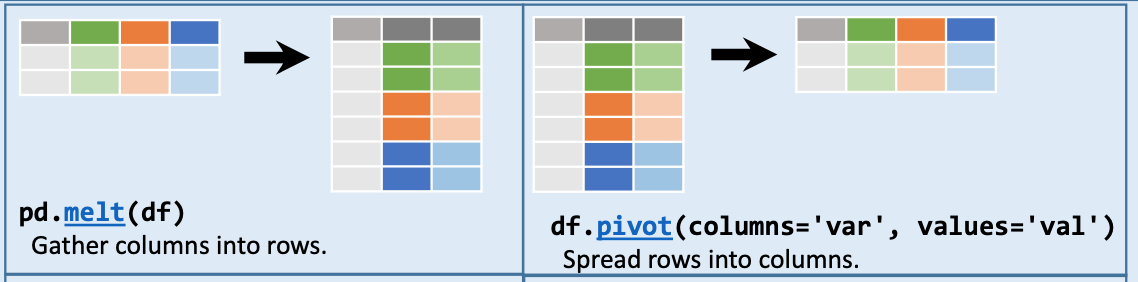

In [167]:
#| code-fold: true
img_colab('melt_pivot.png')

In [168]:
data_wide = data_fred.resample('Q').mean().dropna()
data_wide.head()

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-03-31,8.033333,9.106667,7.784375,8.693333
1977-06-30,8.013333,8.996667,7.721270,8.807692
1977-09-30,7.946667,8.830000,7.658413,8.925000
1977-12-31,8.103333,8.943333,7.855500,8.936923
1978-03-31,8.450000,9.196667,8.221311,9.126923


Pivoting “Wide” to “Long” Format

Here we choose to stack all Yield columns into one. 

`pd.melt()` allows to merge multiple columns into one, producing a DataFrame that is longer than the input:

In [169]:
data_long = pd.melt(data_wide,
                    value_vars = ['AAA', 'BAA', 'DGS30', 'MORTGAGE30US'],
                    var_name = 'SERIES_NAME',
                    value_name = 'SERIES_YIELD',
                    ignore_index=False)
data_long.sort_index()

,SERIES_NAME,SERIES_YIELD
DATE,,
1977-03-31,AAA,8.033333
1977-03-31,BAA,9.106667
1977-03-31,MORTGAGE30US,8.693333
1977-03-31,DGS30,7.784375
1977-06-30,MORTGAGE30US,8.807692
...,...,...
2024-06-30,AAA,5.220000
2024-09-30,BAA,5.720000
2024-09-30,AAA,4.995000


Pivoting “Long” to “Wide” Format

As an inverse operation we want to unstack the long column into many columns, one column per Yield.
`pd.pivot()` allows this, producing a DataFrame that is wider than the input:

In [170]:
data_wide_again = pd.pivot(data_long.reset_index(),
                    index = 'DATE',
                    columns = 'SERIES_NAME',
                    )
data_wide_again

SERIES_YIELD                                 
SERIES_NAME          AAA       BAA     DGS30 MORTGAGE30US
DATE                                                     
1977-03-31      8.033333  9.106667  7.784375     8.693333
1977-06-30      8.013333  8.996667  7.721270     8.807692
1977-09-30      7.946667  8.830000  7.658413     8.925000
1977-12-31      8.103333  8.943333  7.855500     8.936923
1978-03-31      8.450000  9.196667  8.221311     9.126923
...                  ...       ...       ...          ...
2023-09-30      4.913333  5.973333  4.239365     7.040000
2023-12-31      5.210000  6.186667  4.590806     7.303846
2024-03-31      4.970000  5.733333  4.330492     6.748462
2024-06-30      5.220000  5.923333  4.580794     6.995385
2024-09-30      4.995000  5.720000  4.258113     6.585455

[191 rows x 4 columns]

In [171]:
data_wide_again.columns 


MultiIndex([('SERIES_YIELD',          'AAA'),
            ('SERIES_YIELD',          'BAA'),
            ('SERIES_YIELD',        'DGS30'),
            ('SERIES_YIELD', 'MORTGAGE30US')],
           names=[None, 'SERIES_NAME'])

In [172]:
data_wide_again.columns.get_level_values(1)

Index(['AAA', 'BAA', 'DGS30', 'MORTGAGE30US'], dtype='object', name='SERIES_NAME')

In [173]:
data_wide_again.columns = data_wide_again.columns.get_level_values(1)
data_wide_again = data_wide_again.rename_axis(None, axis=1)  


In [174]:
data_wide_again.head(3)

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-03-31,8.033333,9.106667,7.784375,8.693333
1977-06-30,8.013333,8.996667,7.721270,8.807692
1977-09-30,7.946667,8.830000,7.658413,8.925000


In [175]:
data_wide.head(3)

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-03-31,8.033333,9.106667,7.784375,8.693333
1977-06-30,8.013333,8.996667,7.721270,8.807692
1977-09-30,7.946667,8.830000,7.658413,8.925000


## Working with geodata

Inside Airbnb also provide a GeoJSON file of the Bordeaux neighbourhoods.

In [176]:
url_neighborhood = 'http://data.insideairbnb.com/france/nouvelle-aquitaine/bordeaux/2023-06-11/visualisations/neighbourhoods.geojson'

The package [`geopandas`](https://geopandas.org/en/stable/docs/user_guide/mapping.html) allows to deal with such specific data while being similar to `pandas`:

In [156]:
# # Within Google Colab (uncomment below)

# !python3 -m pip install geopandas

In [177]:
import geopandas

df_bordeaux_neighborhood = geopandas.read_file(url_neighborhood)
df_bordeaux_neighborhood.head()

,neighbourhood,neighbourhood_group,geometry
0,Bassens,Bassens,"MULTIPOLYGON Z (((-0.50179 44.91821 0.00000, -..."
1,Talence,Talence,"MULTIPOLYGON Z (((-0.57396 44.81270 0.00000, -..."
2,Artigues-Prs-Bordeaux,Artigues-Prs-Bordeaux,"MULTIPOLYGON Z (((-0.49624 44.84144 0.00000, -..."
3,Carbon-Blanc,Carbon-Blanc,"MULTIPOLYGON Z (((-0.49980 44.89306 0.00000, -..."
4,Bordeaux Sud,Bordeaux,"MULTIPOLYGON Z (((-0.55874 44.83549 0.00000, -..."


You remark at the end of the dataset a column `geometry` containing a shape or geometric location of neighbourhoods.

Some of the neighbourhoods are grouped:

In [179]:
df_bordeaux_neighborhood['neighbourhood_group'].value_counts()

neighbourhood_group
Pessac                        17
Merignac                      10
Bordeaux                       8
Cenon                          3
Bassens                        1
Ambs                           1
Parempuyre                     1
Saint-Aubin-de-Mdoc            1
Gradignan                      1
Villenave-d'Ornon              1
Bgles                          1
Lormont                        1
Floirac                        1
Bouliac                        1
Saint-Vincent-de-Paul          1
Blanquefort                    1
Saint-Louis-de-Montferrand     1
Ambars-et-Lagrave              1
Talence                        1
Le Haillan                     1
Eysines                        1
Le Bouscat                     1
Bruges                         1
Saint-Mdard-en-Jalles          1
Le Taillan-Mdoc                1
Carbon-Blanc                   1
Artigues-Prs-Bordeaux          1
Martignas-sur-Jalle            1
Name: count, dtype: int64

We look at all neighbourhoods within the `Pessac` group:

In [180]:
df_bordeaux_neighborhood[df_bordeaux_neighborhood['neighbourhood_group']=='Pessac']

,neighbourhood,neighbourhood_group,geometry
10,Brivazac-Candau,Pessac,"MULTIPOLYGON Z (((-0.60589 44.80053 0.00000, -..."
13,La Paillre-Compostelle,Pessac,"MULTIPOLYGON Z (((-0.61723 44.79124 0.00000, -..."
15,Chiquet-Fontaudin,Pessac,"MULTIPOLYGON Z (((-0.62489 44.80102 0.00000, -..."
16,Saige,Pessac,"MULTIPOLYGON Z (((-0.62840 44.78518 0.00000, -..."
17,Cap de Bos,Pessac,"MULTIPOLYGON Z (((-0.68063 44.79470 0.00000, -..."
18,Toctoucau,Pessac,"MULTIPOLYGON Z (((-0.72364 44.78064 0.00000, -..."
20,Casino,Pessac,"MULTIPOLYGON Z (((-0.62804 44.80689 0.00000, -..."
21,France Alouette,Pessac,"MULTIPOLYGON Z (((-0.65734 44.79047 0.00000, -..."
23,Le Monteil,Pessac,"MULTIPOLYGON Z (((-0.65507 44.81037 0.00000, -..."
24,3M-Bourgailh,Pessac,"MULTIPOLYGON Z (((-0.67911 44.80185 0.00000, -..."


Using `geopandas.plot()` it is easy to visualize the neighborhood shapes:

<Axes: >

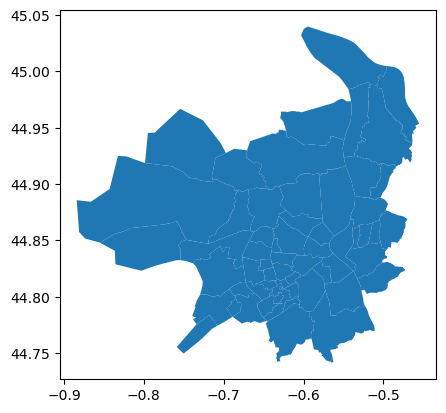

In [181]:
df_bordeaux_neighborhood.plot()

Geospatial data or geodata use Coordinate Reference System (CRS) to represent spatial data on a 2D or 3D surface.

The WGS 84 is a standard used by GPS and oftenly found in open data:

In [182]:
df_bordeaux_neighborhood.crs

<Geographic 3D CRS: EPSG:4979>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We notice that the neighbourhoods use `EPSG:4979` which is 3D coordinate system for WGS84/GPS, usually we prefer 2D when plotting `EPSG:4326` which is 2D coordinate system for WGS84/GPS

Below we use the latitude/longitude of listings to create new geometries (points) for each listings in Bordeaux:

In [183]:
geodf_airbnb_bordeaux = geopandas.GeoDataFrame(df_airbnb_bordeaux_summary,
                                  geometry = geopandas.points_from_xy(df_airbnb_bordeaux_summary['longitude'],
                                                                      df_airbnb_bordeaux_summary['latitude']),
                                                                      crs = 'EPSG:4326')

Using `to_crs()` we enforce that the two GeoDataFrames share the same coordinate system:

In [184]:
df_bordeaux_neighborhood = df_bordeaux_neighborhood.to_crs(geodf_airbnb_bordeaux.crs)

In [185]:
df_bordeaux_neighborhood.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [186]:
geodf_airbnb_bordeaux.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Both are now in 2D EPSG:4326.

Then we can perfom a spatial join between the listings (point geometry) the neigbourhoods (polygon geometry) allowing us to attribute a neighbourhood from the  to each listing.

A spatial join uses binary predicates such as intersects and crosses to combine two GeoDataFrames based on the spatial relationship between their geometries.

In [187]:
geodf_airbnb_bordeaux = geopandas.sjoin(geodf_airbnb_bordeaux, df_bordeaux_neighborhood )
geodf_airbnb_bordeaux.head(3)

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,host_id_name,host_name_alt,geometry,index_right,neighbourhood_right,neighbourhood_group_right
0,222887,Rental unit in Bordeaux · ★4.75 · 2 bedrooms ·...,1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83611,-0.56640,Entire home/apt,270,...,4,176,21,3306300031048,1156398-Suzanna,Host name is Suzanna!,POINT (-0.56640 44.83611),4,Bordeaux Sud,Bordeaux
12,500193,Rental unit in Bordeaux · ★4.42 · 2 bedrooms ·...,2468244,Audrey,Bordeaux,Bordeaux Sud,44.83303,-0.56214,Entire home/apt,103,...,2,277,32,3306300158754,2468244-Audrey,Host name is Audrey!,POINT (-0.56214 44.83303),4,Bordeaux Sud,Bordeaux
16,648539,Rental unit in Bordeaux · ★4.35 · 1 bedroom · ...,3253952,Paul + Sarah,Bordeaux,Bordeaux Sud,44.83265,-0.56627,Entire home/apt,29,...,1,365,0,NaN,3253952-Paul + Sarah,Host name is Paul + Sarah!,POINT (-0.56627 44.83265),4,Bordeaux Sud,Bordeaux


We finally check that the neighboohoods obtained with our spatial join match those already present in the initial listings dataset, two observations differ:

In [188]:
geodf_airbnb_bordeaux[geodf_airbnb_bordeaux.neighbourhood_left!=geodf_airbnb_bordeaux.neighbourhood_right]

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,host_id_name,host_name_alt,geometry,index_right,neighbourhood_right,neighbourhood_group_right
7251,51407948,Rental unit in Bordeaux · ★4.51 · 1 bedroom · ...,26191499,Julie,Le Bouscat,Le Bouscat,44.86052,-0.61174,Entire home/apt,50,...,1,277,14,33063007750AC,26191499-Julie,Host name is Julie!,POINT (-0.61174 44.86052),8,Caudran,Bordeaux
5422,40894602,Rental unit in Mérignac · ★4.31 · 1 bedroom · ...,95846878,David,Merignac,Le Burck,44.81511,-0.63449,Private room,42,...,6,360,5,NaN,95846878-David,Host name is David!,POINT (-0.63449 44.81511),25,Arlac,Merignac


Then we compute an aggregate indicator for each neighbourhood, here the mean price:

In [189]:
avg_price_neighbourhood = (df_airbnb_bordeaux_summary.
                            groupby('neighbourhood').
                            agg({"price": "mean"}))
avg_price_neighbourhood.sort_values('price', ascending = False)

,price
neighbourhood,
Saint-Aubin-de-Mdoc,205.703704
Bouliac,198.809524
Toctoucau,198.000000
Le Taillan-Mdoc,190.712644
Magonty,180.534884
...,...
3M-Bourgailh,66.454545
Le Vallon-Les Echoppes,61.407407
La Paillre-Compostelle,58.052632


We enrich the GeoDataFrame of neighbourhoods with the average price:

In [190]:
df_bordeaux_neighborhood = df_bordeaux_neighborhood.merge(avg_price_neighbourhood, on = 'neighbourhood')

The we are able to plot the average price by neighbourhood on a map (aka [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)):

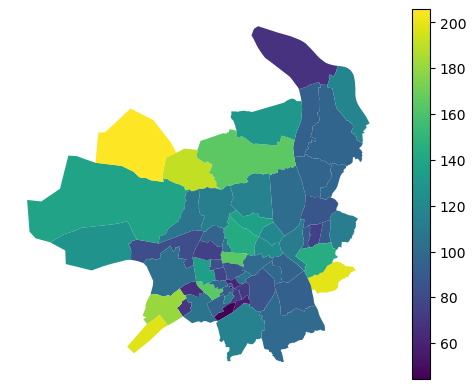

In [191]:
df_bordeaux_neighborhood.plot(column='price', legend=True).set_axis_off()

As an exercise can you plot instead the number of listings per neighbourhood

In [192]:
# YOUR CODE HERE

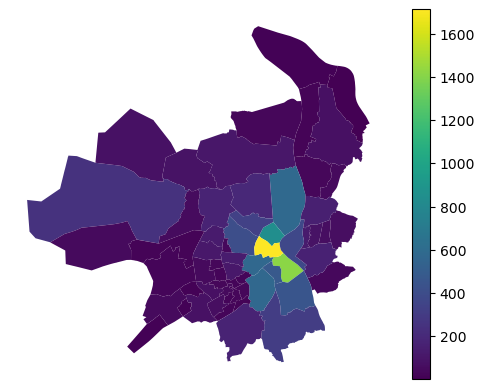

In [193]:
#| code-fold: true
count_listings_neighbourhood = (df_airbnb_bordeaux_summary.
                                loc[:, ['id','neighbourhood']].
                                groupby('neighbourhood').
                                count())
count_listings_neighbourhood.sort_values('id', ascending = False)

(df_bordeaux_neighborhood.
    merge(count_listings_neighbourhood, on = 'neighbourhood').
    plot(column='id', legend=True).
    set_axis_off())

We add a base layer of Bordeaux area to plot something nice. Web basemaps are usually provided in Web Mercator projection (EPSG:3857), so we align everything to this projection (crs=3857):

In [173]:
# # Within Google Colab (uncomment below)

# !python3 -m pip install contextily

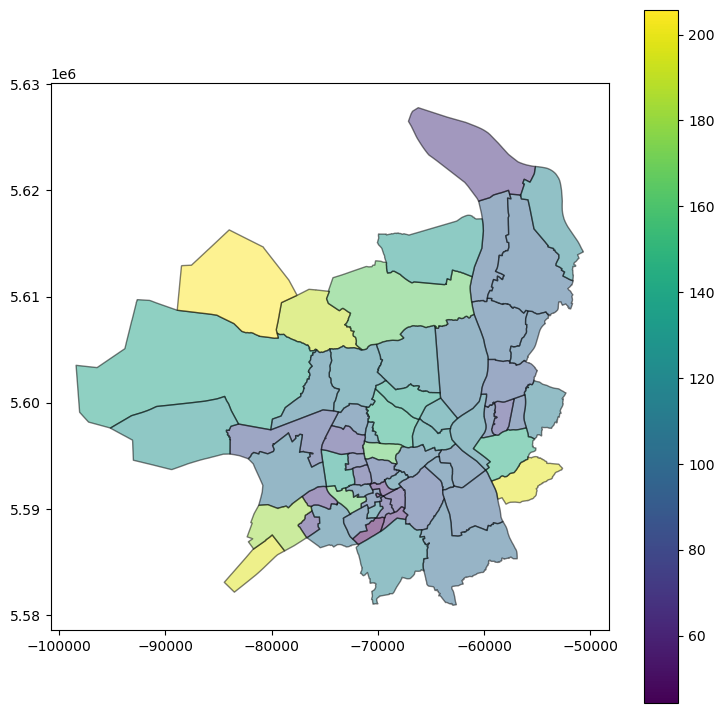

In [204]:
import contextily
ax = (df_bordeaux_neighborhood.
        to_crs(3857).
        plot(column='price',
             figsize=(9,9),
             legend=True,
             alpha=0.5,
             edgecolor="k"))
         

In [234]:
contextily.add_basemap(ax,
                         crs=3857,
                         source=contextily.providers.Stamen.TonerLite)
ax.set_axis_off()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x16326c450>

Some obscure bug occuring, the same command showed this last year:

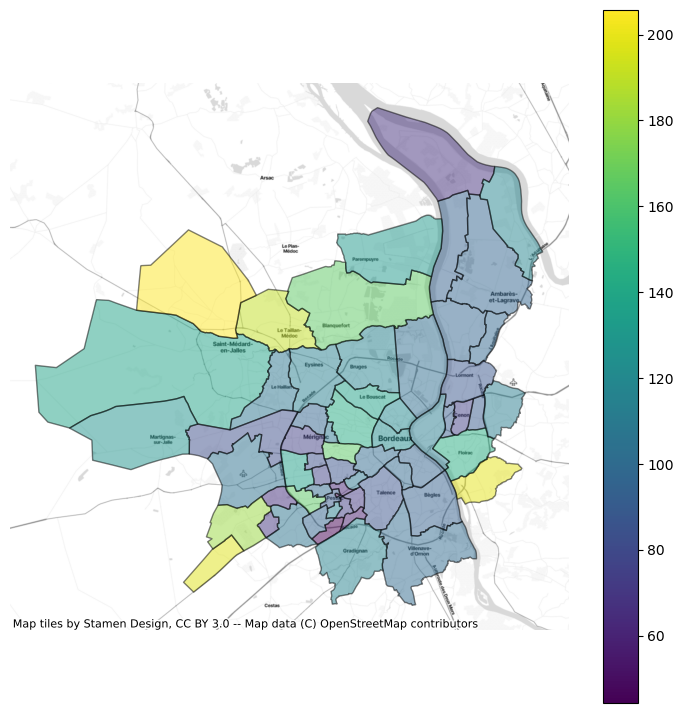

In [235]:
#| code-fold: true
img_colab('last_year_contextily.png')

More about geospatial data in this course: [Introduction to Geoprocessing](https://spatial-networks-lab.pages.gitlab.kuleuven.be/igp-course-website-2021/week5.html).

## Basic pandas plotting

pandas provides helper functions to [quickly plot data](https://pandas.pydata.org/docs/user_guide/visualization.html) 

We start plotting an histogram of listings prices to get a sense of price distribution:

In [210]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

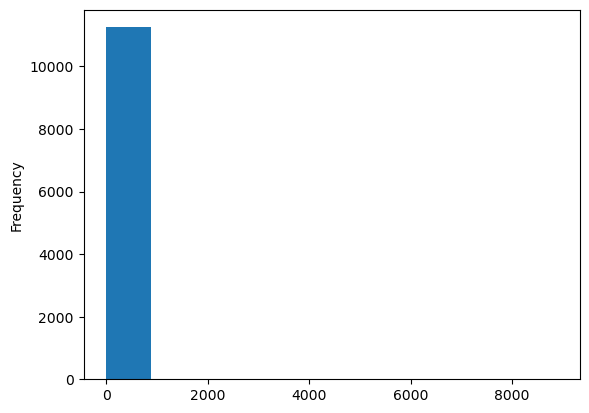

In [211]:
df_airbnb_bordeaux_summary['price'].plot.hist(bins=10)

Due to outliers we have to work a little bit on the bins, either we augment the number of bins:

<Axes: ylabel='Frequency'>

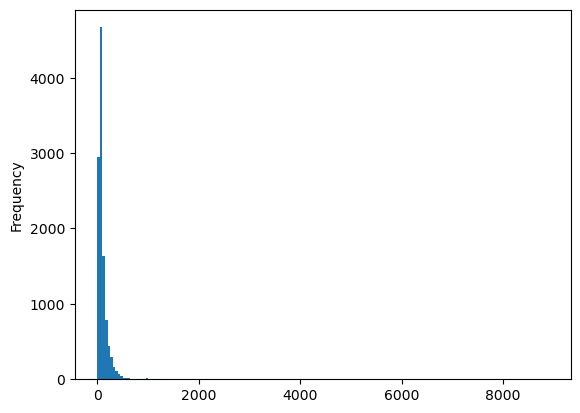

In [212]:
max_price = max(df_airbnb_bordeaux_summary['price'])
n_bins = int(max_price/50)
n_bins

df_airbnb_bordeaux_summary['price'].plot.hist(bins=n_bins, range=(0, int(max_price)))

Or we cap the max price at 1000:

<Axes: ylabel='Frequency'>

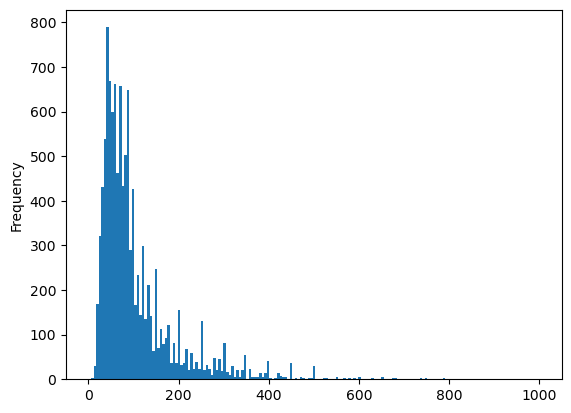

In [178]:
(df_airbnb_bordeaux_summary.
    loc[df_airbnb_bordeaux_summary['price']<1000, 'price'].
    plot.hist(bins=n_bins, range=(0, 1000)))

We might also take the log, removing listings with price 0:

<Axes: ylabel='Frequency'>

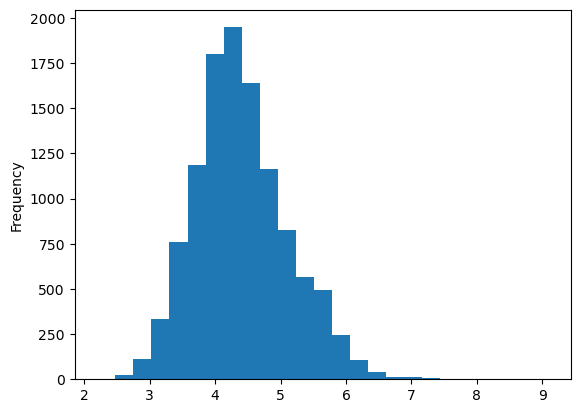

In [179]:
(df_airbnb_bordeaux_summary.
    # filtering <=0 prices before taking the log
    loc[df_airbnb_bordeaux_summary['price']>0, :].
    # creating a log price column  
    assign(log_price = lambda x: np.log(x['price'])).
    loc[:, 'log_price'].
    plot.hist(bins=25))

Another way to consider distributions is to use boxplots, for example here we perform the boxplots with respect to variable neighbourhood:

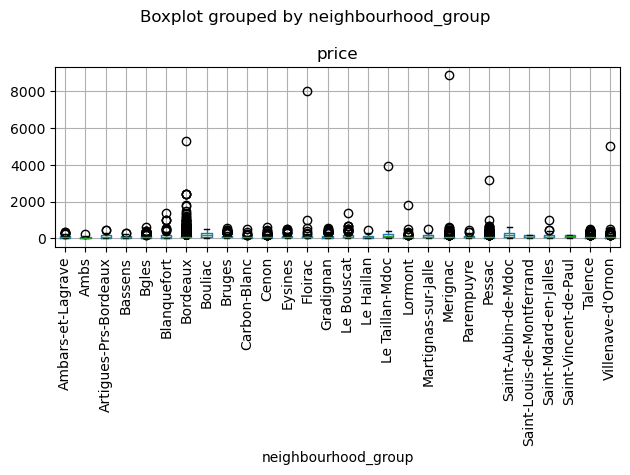

In [180]:
df_airbnb_bordeaux_summary.boxplot('price', by='neighbourhood_group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Price outliers impact the plot readability, so that we cut prices > 600:

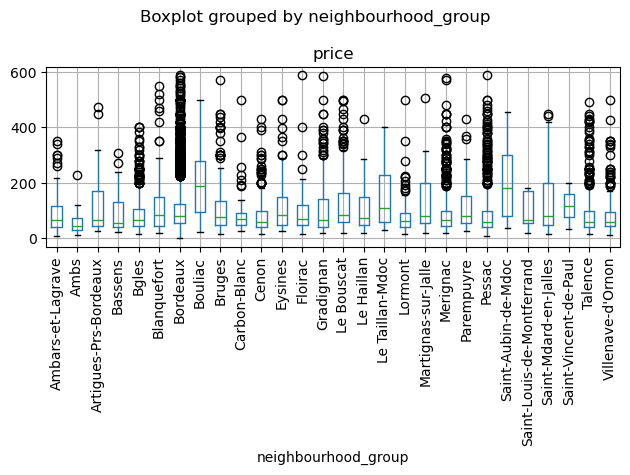

In [181]:
(df_airbnb_bordeaux_summary.
    loc[df_airbnb_bordeaux_summary['price']<600].
    boxplot('price', by='neighbourhood_group'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [182]:
outer_merge.dtypes

id                float64
listing_url        object
host_name          object
price_x            object
listing_id        float64
date               object
available          object
price_y            object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

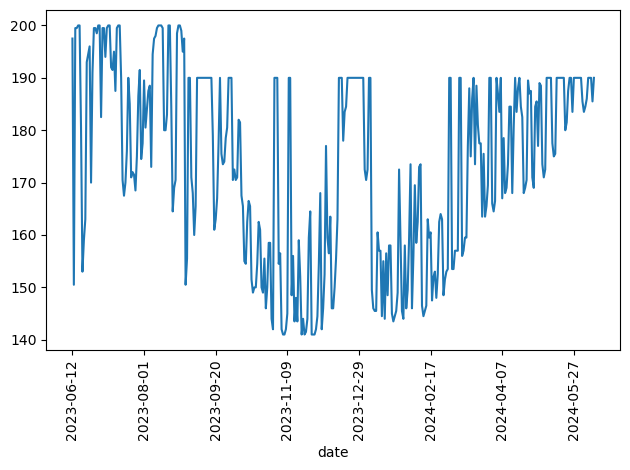

In [183]:
(inner_merge.assign(price=lambda x: pd.to_numeric(x['price_y'].
                                         str.replace('$', '').
                                         str.replace(',', ''))).
            # loc[lambda x: x['price']<400].
groupby(['date'])['price'].mean()).plot()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Intro to webscraping

Web scraping is a data extraction technique that involves automatically retrieving information from websites by parsing their HTML structure.

The pandas `read_html` is meant to deal with tables (HTML tag `<table>`), it returns a list of Dataframe (empty, one or more elements) and performs rather well, you sometimes have to edit a bit the DataFrame:

In [213]:
wiki_beer_old = 'https://en.wikipedia.org/w/index.php?title=List_of_Belgian_beers&diff=829421783&oldid=825178994'
data_old = pd.read_html(wiki_beer_old, attrs={'class':"wikitable sortable"})
print(len(data_old))
data_old[0].head(4)


27


,Brand,Sort,Fermentation method,Alcohol content,Brewery
0,3 Schténg[4][5][6][7][8][9],"Flemish Old Brown, regional beer",Top fermentation,6%,"Brasserie Grain d'Orge, 4852 Hombourg, Liège [..."
1,IV Saison[15][16][17][18],"Saison (Blonde, Golden ale)",Top fermentation-not centrifugated,6.5%,Brasserie de Jandrain-Jandrenouille[19][20]
2,V Cense[21][16][22][23],Amber or Speciale Belge,Top fermentation,7.5%,Brasserie de Jandrain-Jandrenouille[19][20]
3,VI Wheat[24][16][25][26],Wheat beer,Top fermentation,6%,Brasserie de Jandrain-Jandrenouille[19][20]


Remove footnotes in the text, as always with pandas, many ways to do it:

In [214]:
(data_old[0]['Brand'].
    str.replace('\[\d+\]', '', regex=True).
    head(4))

0    3 Schténg
1    IV Saison
2      V Cense
3     VI Wheat
Name: Brand, dtype: object

In [215]:
(data_old[0][['Brand', 'Brewery']].
    replace('\[\d+\]', '', regex=True).
    head(4))

,Brand,Brewery
0,3 Schténg,"Brasserie Grain d'Orge, 4852 Hombourg, Liège ..."
1,IV Saison,Brasserie de Jandrain-Jandrenouille
2,V Cense,Brasserie de Jandrain-Jandrenouille
3,VI Wheat,Brasserie de Jandrain-Jandrenouille


In [216]:
(data_old[0][['Brand', 'Brewery']].
    apply(lambda x: x.str.replace('\[\d+\]', '', regex=True)).
    head(4))

,Brand,Brewery
0,3 Schténg,"Brasserie Grain d'Orge, 4852 Hombourg, Liège ..."
1,IV Saison,Brasserie de Jandrain-Jandrenouille
2,V Cense,Brasserie de Jandrain-Jandrenouille
3,VI Wheat,Brasserie de Jandrain-Jandrenouille


In [217]:
wiki_beer_curr = 'https://en.wikipedia.org/w/index.php?title=List_of_Belgian_beers'
data_curr = pd.read_html(wiki_beer_curr, attrs={'class':"wikitable sortable"})
print(len(data_curr))
data_curr[0].head(4)

1


,Beer name,Beer style,colour,ABV,Brewery
0,"Chimay Gold: ""Doree""",trappist pale ale,gold,4.8%,Chimay Brewery (official trappist)
1,"Chimay Blue: ""Grande Reserve""",trappist dark ale,dark,9.0%,Chimay Brewery (official trappist)
2,"Chimay Red: ""Premiere""",trappist dubbel,dark,7.0%,Chimay Brewery (official trappist)
3,"Chimay White: ""Cinq Cents Tripel""",trappist tripel,dark,8.0%,Chimay Brewery (official trappist)


An alternative is to use `requests` (for requesting web pages) and `BeautifulSoup` (for "parsing" html).

In [219]:
import requests
from bs4 import BeautifulSoup

user_agent = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
wiki_beer_html = requests.get(wiki_beer_curr, headers=user_agent)

In [220]:
print(wiki_beer_html.headers)

{'date': 'Tue, 17 Sep 2024 09:11:15 GMT', 'server': 'mw-web.eqiad.main-575bddf9c4-v2b9w', 'x-content-type-options': 'nosniff', 'content-language': 'en', 'origin-trial': 'AonOP4SwCrqpb0nhZbg554z9iJimP3DxUDB8V4yu9fyyepauGKD0NXqTknWi4gnuDfMG6hNb7TDUDTsl0mDw9gIAAABmeyJvcmlnaW4iOiJodHRwczovL3dpa2lwZWRpYS5vcmc6NDQzIiwiZmVhdHVyZSI6IlRvcExldmVsVHBjZCIsImV4cGlyeSI6MTczNTM0Mzk5OSwiaXNTdWJkb21haW4iOnRydWV9', 'accept-ch': '', 'vary': 'Accept-Encoding,Cookie,Authorization', 'last-modified': 'Wed, 11 Sep 2024 21:32:37 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '5', 'x-cache': 'cp6012 miss, cp6011 hit/2', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp6011"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reporting

In [221]:
print(wiki_beer_html.content)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Beer in Belgium - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 v

Looking at the web browser Inspector (e.g. Firefox/Right click/Inspect Element):

<!---
do not work on Colab
portable alternative below
![Image](./assets/beer_wiki.png)
-->

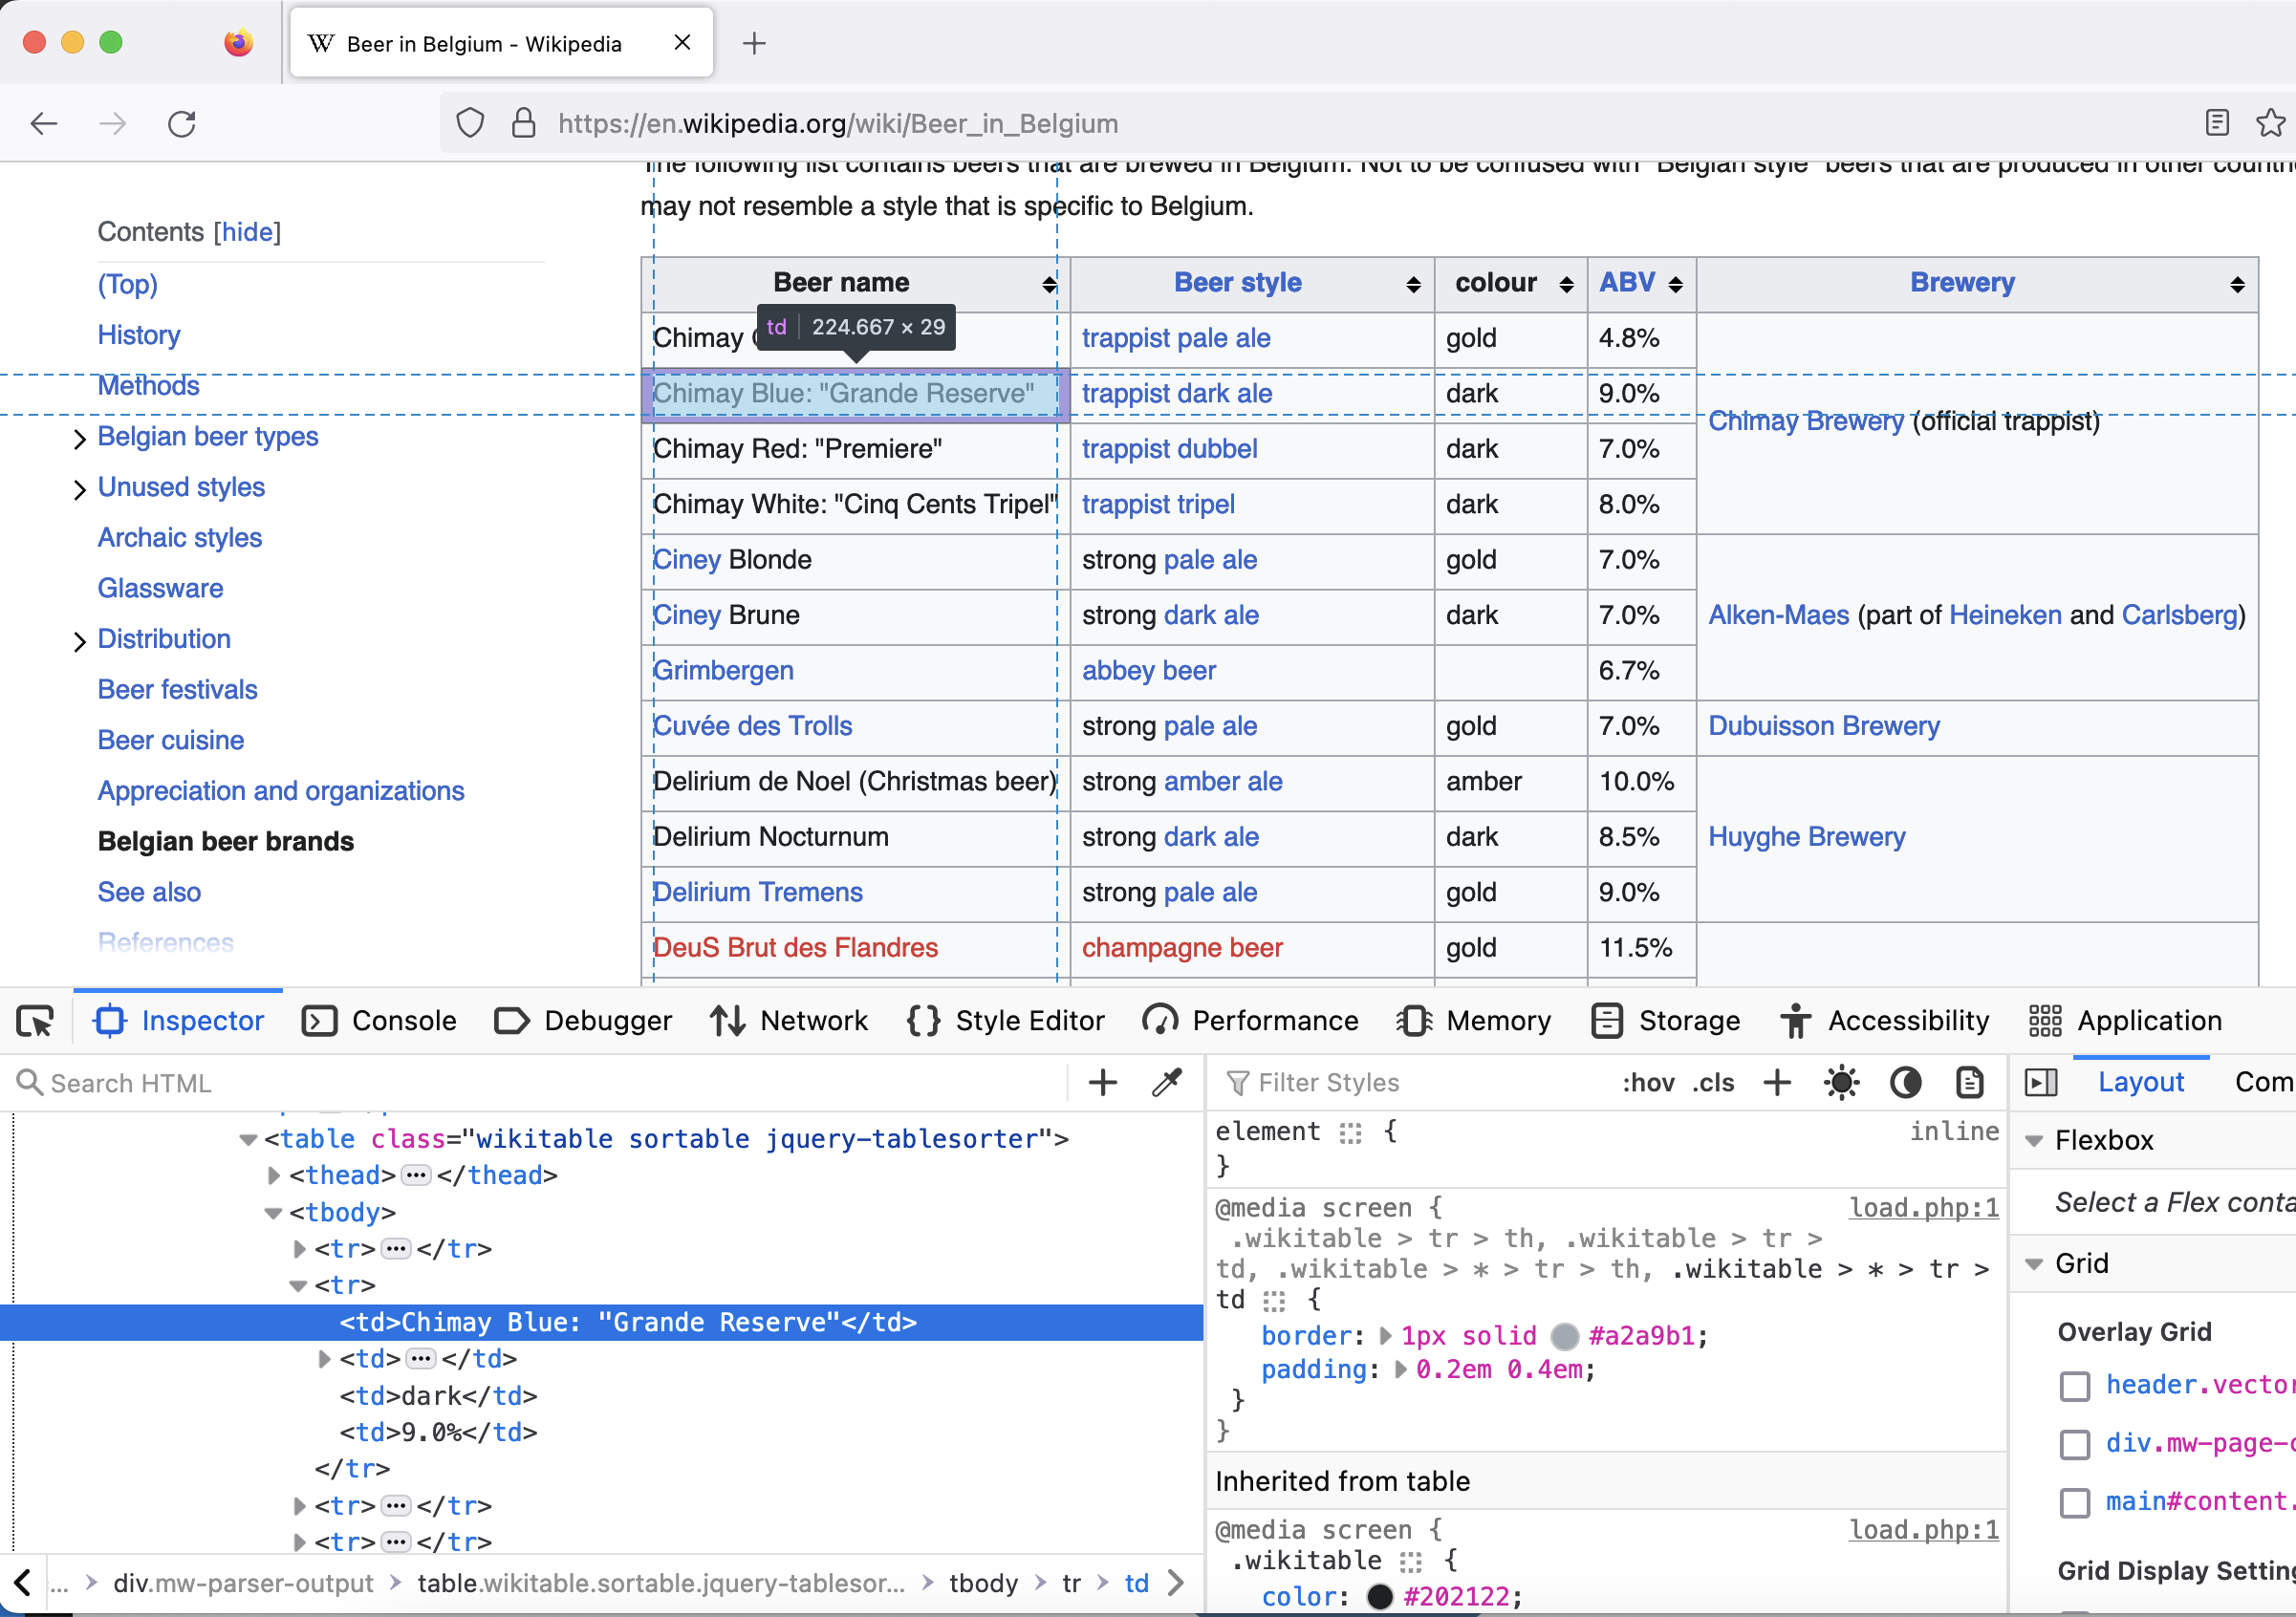

In [222]:
#| code-fold: true
img_colab('beer_wiki.png')

In [223]:
soup = BeautifulSoup(wiki_beer_html.content)
(soup.
    find_all("body")[0].
    prettify().
    splitlines()[:25]) 

['<body class="skin--responsive skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Beer_in_Belgium rootpage-Beer_in_Belgium skin-vector-2022 action-view">',
 ' <a class="mw-jump-link" href="#bodyContent">',
 '  Jump to content',
 ' </a>',
 ' <div class="vector-header-container">',
 '  <header class="vector-header mw-header">',
 '   <div class="vector-header-start">',
 '    <nav aria-label="Site" class="vector-main-menu-landmark">',
 '     <div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown">',
 '      <input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>',
 '      <label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx

In [224]:
table = soup.find_all("table", attrs={"class" : "wikitable sortable"})
(table [0].
    prettify().
    splitlines()[:25]) 

['<table class="wikitable sortable">',
 ' <tbody>',
 '  <tr>',
 '   <th>',
 '    Beer name',
 '   </th>',
 '   <th>',
 '    <a href="/wiki/Beer_style" title="Beer style">',
 '     Beer style',
 '    </a>',
 '   </th>',
 '   <th>',
 '    colour',
 '   </th>',
 '   <th>',
 '    <a href="/wiki/Alcohol_by_volume" title="Alcohol by volume">',
 '     ABV',
 '    </a>',
 '   </th>',
 '   <th>',
 '    <a href="/wiki/Brewery" title="Brewery">',
 '     Brewery',
 '    </a>',
 '   </th>',
 '  </tr>']

We manually extract the headers of the table (i.e. the names of columns):

In [225]:
ths = table[0].find_all('th')
headers = [th.text.replace('\n', '') for th in ths]
headers

['Beer name', 'Beer style', 'colour', 'ABV', 'Brewery']

For each row (`<tr>`) in table, we get each cells/items (`<td>`), remove unecessary white spaces, and store the result into a list of rows (rows respresented as lists):

In [226]:
rows = table[0].find_all('tr')

data_list = []
for tr in rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        data_list.append(row)


From this list of rows we create a pandas DataFrame:

In [227]:

data_curr = pd.DataFrame(data_list, columns=headers)
data_curr.head(5)

,Beer name,Beer style,colour,ABV,Brewery
0,"Chimay Gold: ""Doree""",trappist pale ale,gold,4.8%,Chimay Brewery (official trappist)
1,"Chimay Blue: ""Grande Reserve""",trappist dark ale,dark,9.0%,None
2,"Chimay Red: ""Premiere""",trappist dubbel,dark,7.0%,None
3,"Chimay White: ""Cinq Cents Tripel""",trappist tripel,dark,8.0%,None
4,Ciney Blonde,strong pale ale,gold,7.0%,Alken-Maes (part of Heineken and Carlsberg)


To deal with Brewery cells sometimes spanning multiple lines, a solution is to use the `.ffill()` method:

In [228]:
data_curr['Brewery']  = data_curr['Brewery'].ffill()
data_curr.head(5)

,Beer name,Beer style,colour,ABV,Brewery
0,"Chimay Gold: ""Doree""",trappist pale ale,gold,4.8%,Chimay Brewery (official trappist)
1,"Chimay Blue: ""Grande Reserve""",trappist dark ale,dark,9.0%,Chimay Brewery (official trappist)
2,"Chimay Red: ""Premiere""",trappist dubbel,dark,7.0%,Chimay Brewery (official trappist)
3,"Chimay White: ""Cinq Cents Tripel""",trappist tripel,dark,8.0%,Chimay Brewery (official trappist)
4,Ciney Blonde,strong pale ale,gold,7.0%,Alken-Maes (part of Heineken and Carlsberg)


Sometimes you have to use a http POST request, for example when dealing with forms. For example on the FED TreasuryDirect website, in order to get a daily list of US Treasury prices, you first have to specificy a value date:

<!---
do not work on Colab
portable alternative below
![Image](./assets/treasury_post_input.png)
-->

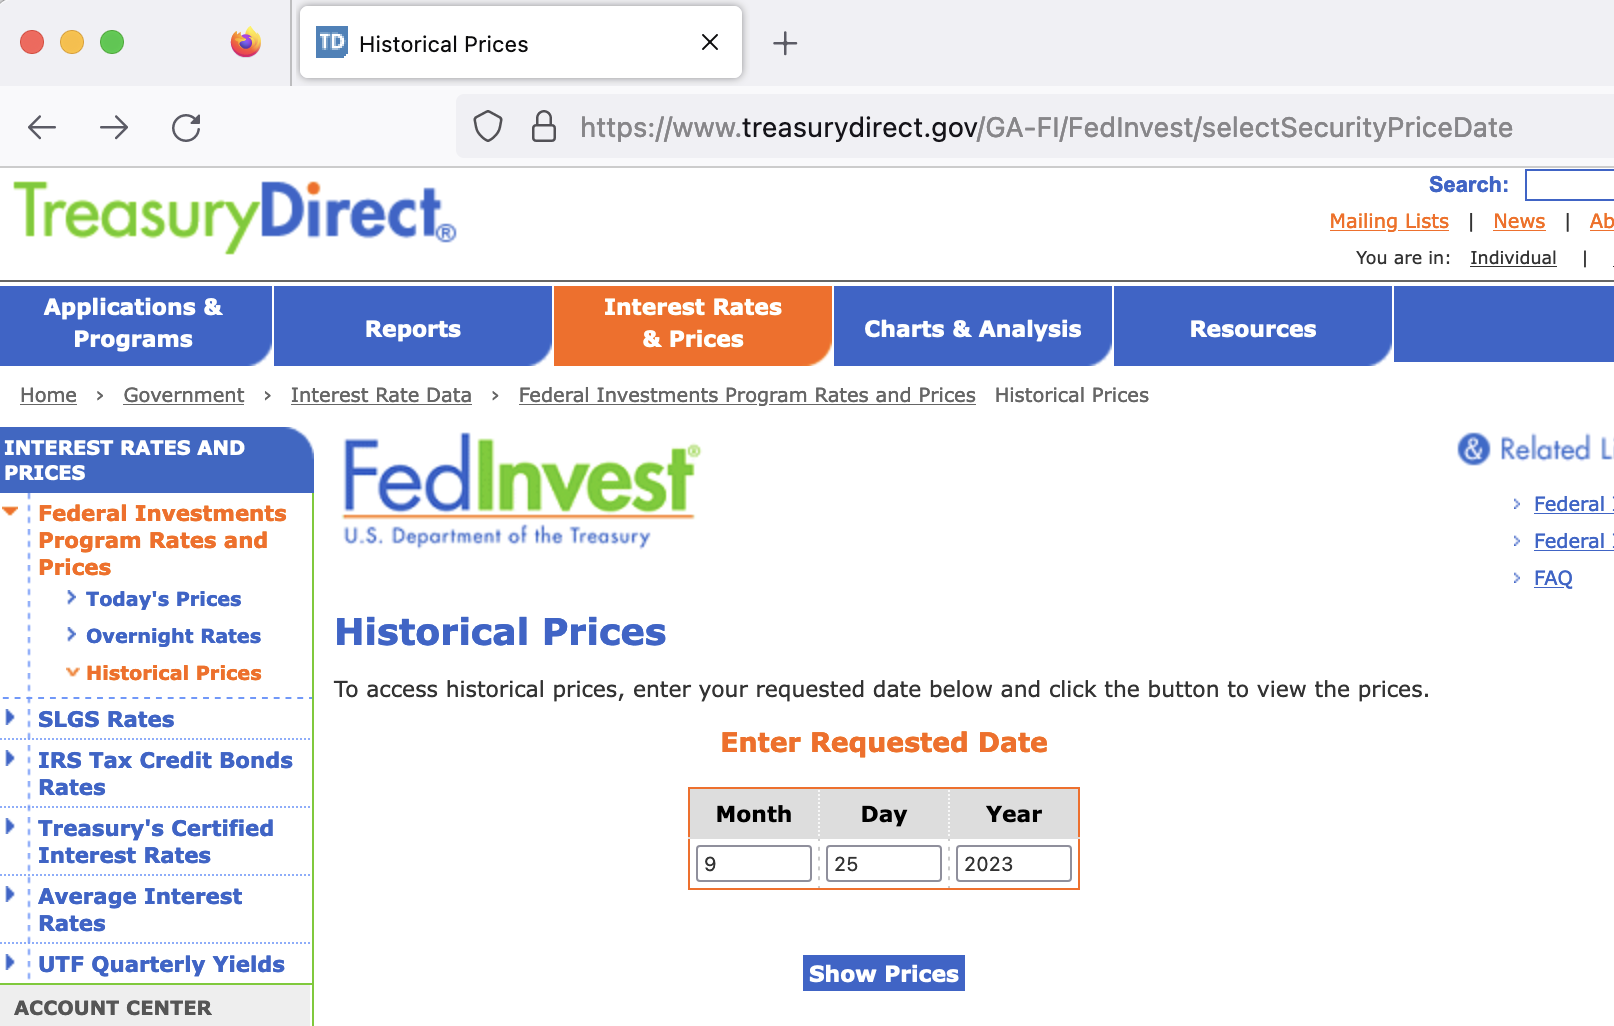

In [229]:
#| code-fold: true
img_colab('treasury_post_input.png')

Inspecting a little bit the web page, we see that a POST request is launched together with date parameters:

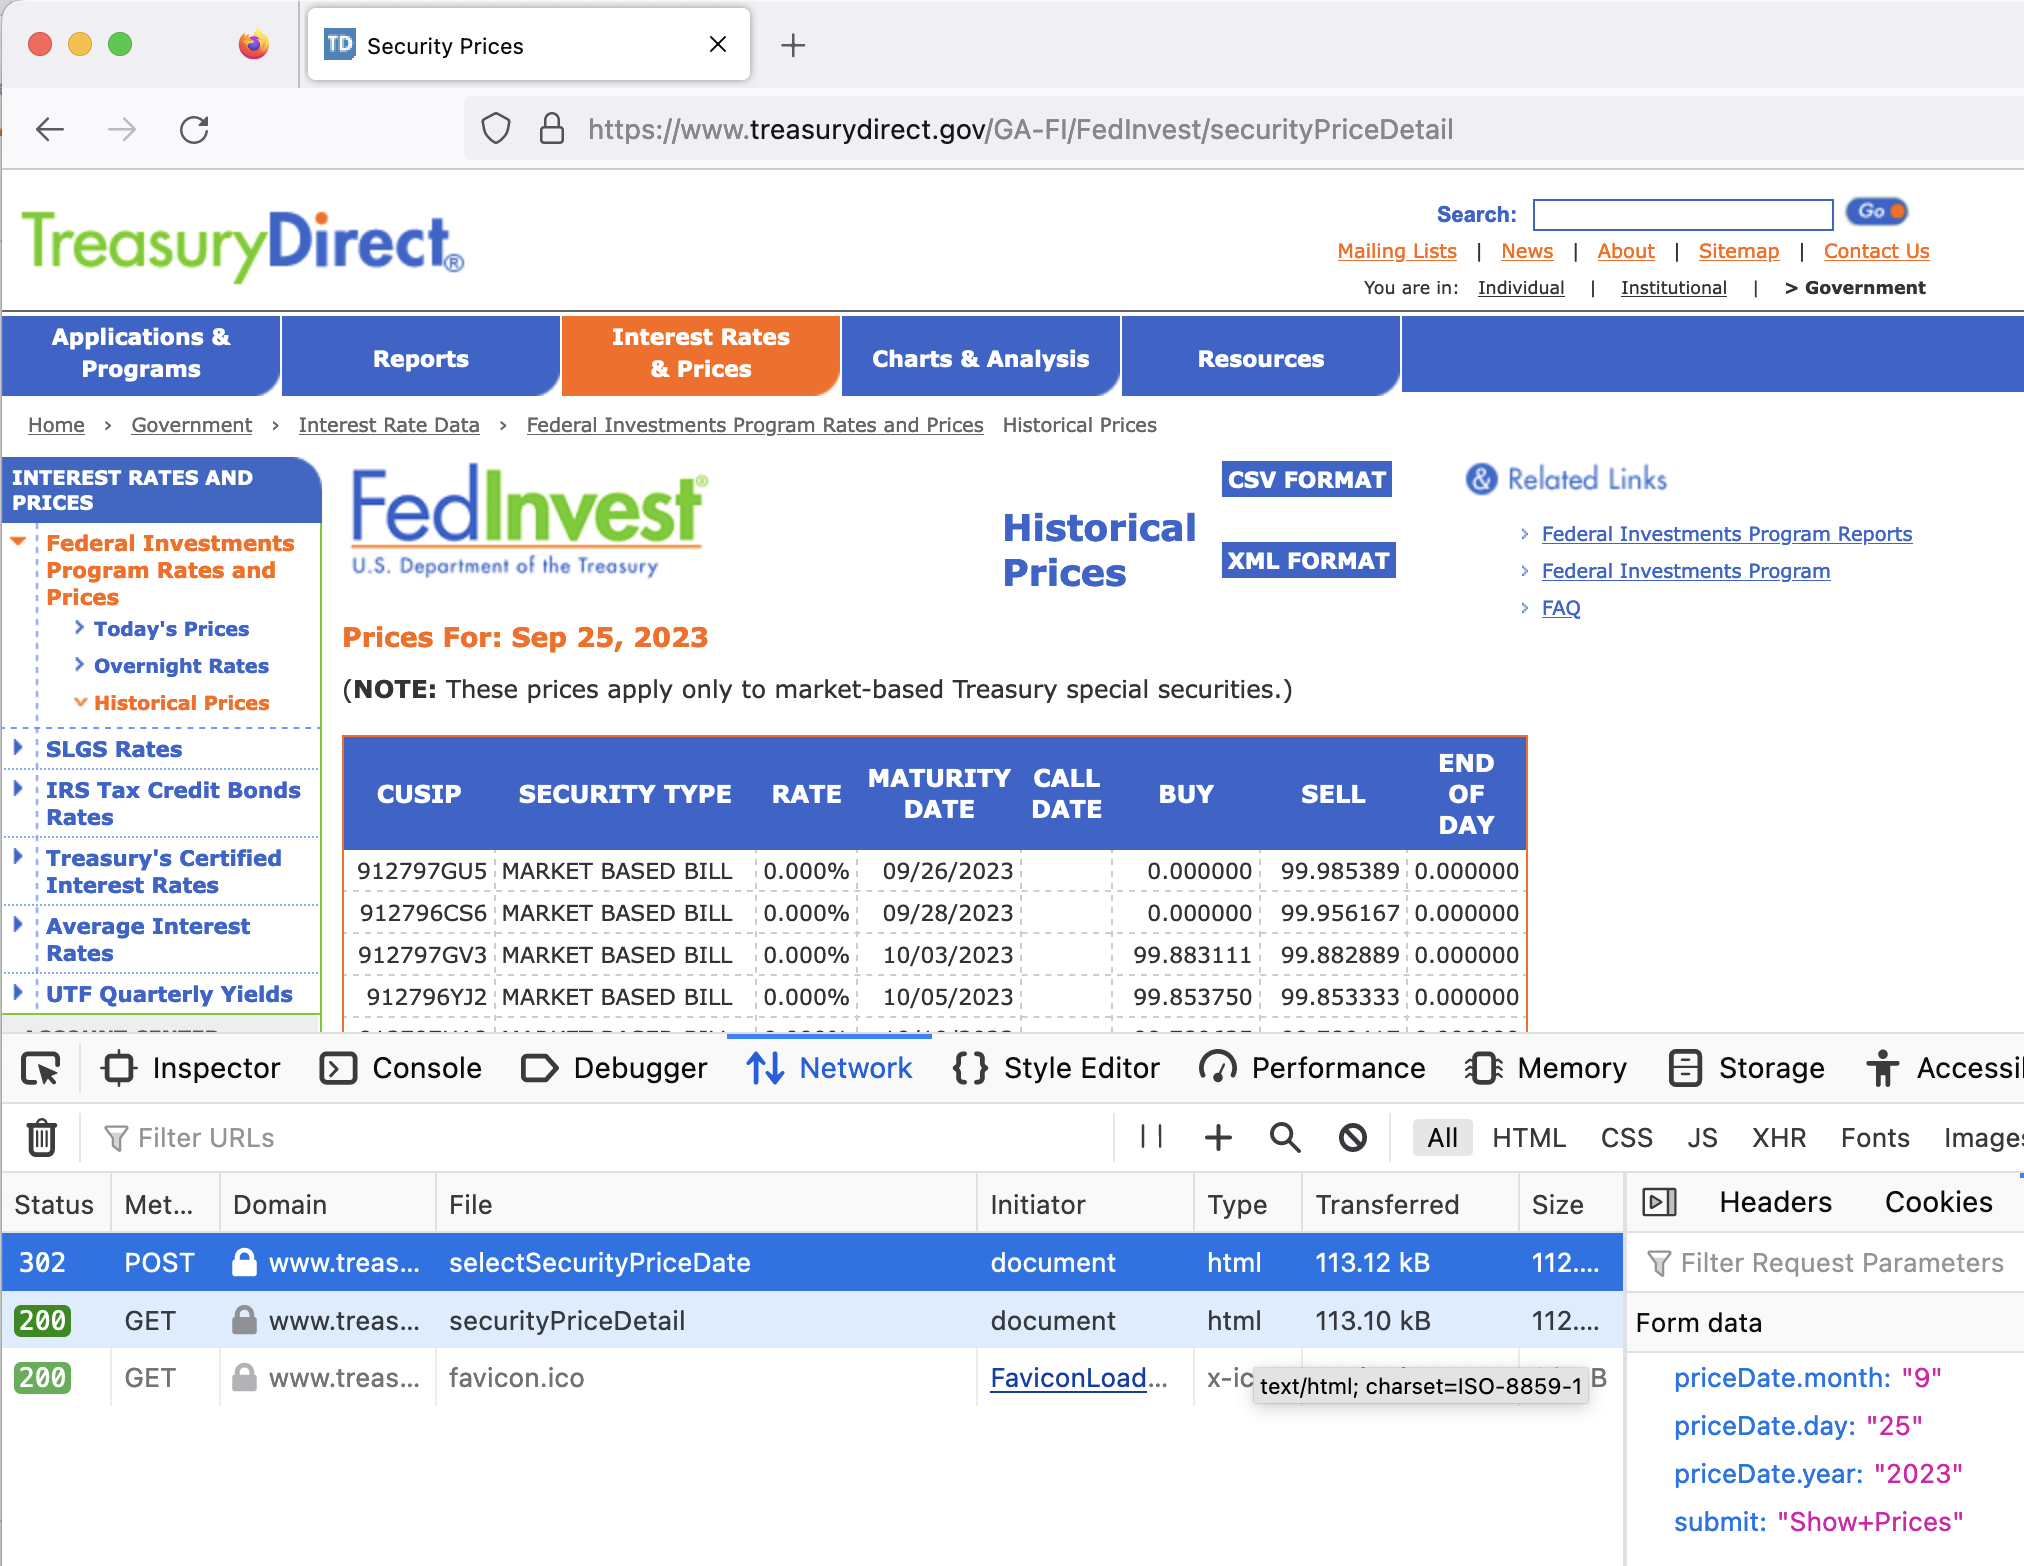

In [230]:
#| code-fold: true
img_colab('treasury_post_finish.png')

We can use `requests` package to submit a POST reauest with params:

In [231]:
treasury_post_url = 'https://www.treasurydirect.gov/GA-FI/FedInvest/selectSecurityPriceDate'

In [232]:
from urllib import parse
from io import StringIO

month = 9
day = 25
year = 2023

post_params = f'priceDate.month={month}&priceDate.day={day}&priceDate.year={year}&submit=Show+Prices'

r = requests.post(treasury_post_url, data=parse.parse_qs(post_params), headers=user_agent)
r

<Response [200]>

Reading the content of the response to pandas:

In [233]:
df_treasuries = pd.read_html(StringIO(str(BeautifulSoup(r.content))))[0]
df_treasuries.head(4)

,CUSIP,SECURITY TYPE,RATE,MATURITY DATE,CALL DATE,BUY,SELL,END OF DAY
0,912797GU5,MARKET BASED BILL,0.000%,09/26/2023,NaN,0.000000,99.985389,100.000000
1,912796CS6,MARKET BASED BILL,0.000%,09/28/2023,NaN,0.000000,99.956167,99.970778
2,912797GV3,MARKET BASED BILL,0.000%,10/03/2023,NaN,99.883111,99.882889,99.897528
3,912796YJ2,MARKET BASED BILL,0.000%,10/05/2023,NaN,99.853750,99.853333,99.868000
